In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Relative Importance Index 

import pandas as pd

custom_colors = [
    "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
    "#D55E00", "#CC79A7", "#999999", "#F4A582", "#92C5DE",
    "#B2182B", "#2166AC"
]

# Load the data
df1 = pd.read_csv('TABASCO_CAMPECHE_fishing_reports.csv', low_memory=False)
df2 = pd.read_csv('AVISOS_MAYORES_2017_2023.csv', low_memory=True)

# Rename the column before any operations
df1.rename(columns={'NOMBRE PRINCIPAL': 'Fish Name'}, inplace=True)

# Preprocess the first dataframe

df1.rename(columns={'NOMBRE PRINCIPAL': 'Fish Name'}, inplace=True)
df1['FECHA AVISO'] = pd.to_datetime(df1['FECHA AVISO'], format='%d/%m/%Y')
df1['YEAR'] = df1['FECHA AVISO'].dt.year
df1['MONTH'] = df1['FECHA AVISO'].dt.month
df1 = df1[df1['YEAR'] != 2016]
df1 = df1[df1['Fish Name'] != 'OSTION']
df1 = df1[df1['Fish Name'] != 'OTRAS']
df1['NOMBRE OFICINA'] = df1['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')

# Rename the column before any operations
df2.rename(columns={'NOMBRE PRINCIPAL': 'Fish Name'}, inplace=True)
df2 = df2[(df2['NOMBRE ESTADO'] == 'TABASCO') | (df2['NOMBRE ESTADO'] == 'CAMPECHE')]
df2['FECHA AVISO'] = pd.to_datetime(df2['FECHA AVISO'], format='%d/%m/%Y')
df2['YEAR'] = df2['FECHA AVISO'].dt.year
df2['MONTH'] = df2['FECHA AVISO'].dt.month
df2 = df2[df2['YEAR'] != 2016]
df2 = df2[df2['Fish Name'] != 'OSTION']
df2 = df2[df2['Fish Name'] != 'OTRAS']
df2['NOMBRE OFICINA'] = df2['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')

# Function to calculate IIR and return the DataFrame
def calculate_iir(df):
    # Create a new column for the value of the catch
    df['Value (MXN)'] = df['PESO DESEMBARCADO_KILOGRAMOS'] * df['PRECIO_PESOS']
    
    # 1. Identify the top 10 Fish Name by their catch volume in PESO DESEMBARCADO_KILOGRAMOS
    by_volume = df.groupby('Fish Name')['PESO DESEMBARCADO_KILOGRAMOS'].sum()

    # 2. Identify the top 10 Fish Name by the value of the catch
    by_value = df.groupby('Fish Name')['Value (MXN)'].sum()

    # 3. Identify the frequency with which each Fish Name of the top 10 by volume is reported
    by_frequency = df[df['Fish Name'].isin(by_volume.index)]['Fish Name'].value_counts()

    # 4. Count unique 'UNIDAD ECONOMICA' for each Fish Name
    unique_units = df.groupby('Fish Name')['UNIDAD ECONOMICA'].nunique()

    # Calculate the percentage of catch, value, and frequency
    total_volume = df['PESO DESEMBARCADO_KILOGRAMOS'].sum()
    total_value = df['Value (MXN)'].sum()
    total_reports = len(df)

    percent_volume = by_volume / total_volume * 100
    percent_value = by_value / total_value * 100
    percent_frequency = by_frequency / total_reports * 100

    # Create a DataFrame for the percentages
    iir_df = pd.DataFrame({
        'Fish Name': by_volume.index,
        '% Capture': percent_volume.values,
        '% Value': percent_value.reindex(by_volume.index).values,
        '% Frequency': percent_frequency.reindex(by_volume.index).values,
        'Unique Units': unique_units.reindex(by_volume.index).values  # Add unique units count
    })

    # Calculate the Relative Importance Index (IIR)
    iir_df['IIR'] = (iir_df['% Capture'] + iir_df['% Value'] + iir_df['% Frequency']) / 3

    # Sort by IIR in descending order
    iir_df = iir_df.sort_values(by='IIR', ascending=False)

    return iir_df

# Calculate IIR for both dataframes
iir_df1 = calculate_iir(df1)
iir_df2 = calculate_iir(df2)

# Display the top 10 species by IIR for each dataframe
top_10_iir_df1 = iir_df1.head(10)
top_10_iir_df2 = iir_df2.head(10)

# Display the final tables
print("Top 10 Species by IIR for df1:")
print(top_10_iir_df1)

print("\nTop 10 Species by IIR for df2:")
print(top_10_iir_df2)


Top 10 Species by IIR for df1:
      Fish Name  % Capture    % Value  % Frequency  Unique Units        IIR
35        PULPO  17.898764  33.731107    11.842545          1004  21.157472
37       ROBALO   6.775630  16.261559    12.400674          1385  11.812621
22        JUREL  15.368730   4.817931    12.680637          1335  10.955766
4       BANDERA   7.996785   3.423814     4.610046           848   5.343548
30      MOJARRA   4.205814   4.632029     5.778057           731   4.871967
40        RUBIO   3.559691   1.887628     8.320545          1094   4.589288
21        JAIBA   7.153514   3.353040     2.612929           160   4.373161
20  GUACHINANGO   2.604617   6.003756     3.268092           707   3.958822
18      CORVINA   2.596884   2.099813     6.150742          1163   3.615813
13      CARACOL   6.014879   2.936514     1.547524           174   3.499639

Top 10 Species by IIR for df2:
             Fish Name  % Capture    % Value  % Frequency  Unique Units  \
7              CAMARON  73

In [3]:
top_10_iir_df1 = top_10_iir_df1.round(2)
top_10_iir_df1

,Fish Name,% Capture,% Value,% Frequency,Unique Units,IIR
35,PULPO,17.90,33.73,11.84,1004,21.16
37,ROBALO,6.78,16.26,12.40,1385,11.81
22,JUREL,15.37,4.82,12.68,1335,10.96
4,BANDERA,8.00,3.42,4.61,848,5.34
30,MOJARRA,4.21,4.63,5.78,731,4.87
40,RUBIO,3.56,1.89,8.32,1094,4.59
21,JAIBA,7.15,3.35,2.61,160,4.37
20,GUACHINANGO,2.60,6.00,3.27,707,3.96
18,CORVINA,2.60,2.10,6.15,1163,3.62
13,CARACOL,6.01,2.94,1.55,174,3.50


In [4]:
top_10_iir_df1_list = top_10_iir_df1['Fish Name']

In [5]:
top_10_iir_df2 = top_10_iir_df2.round(2)
top_10_iir_df2_list = top_10_iir_df2['Fish Name']

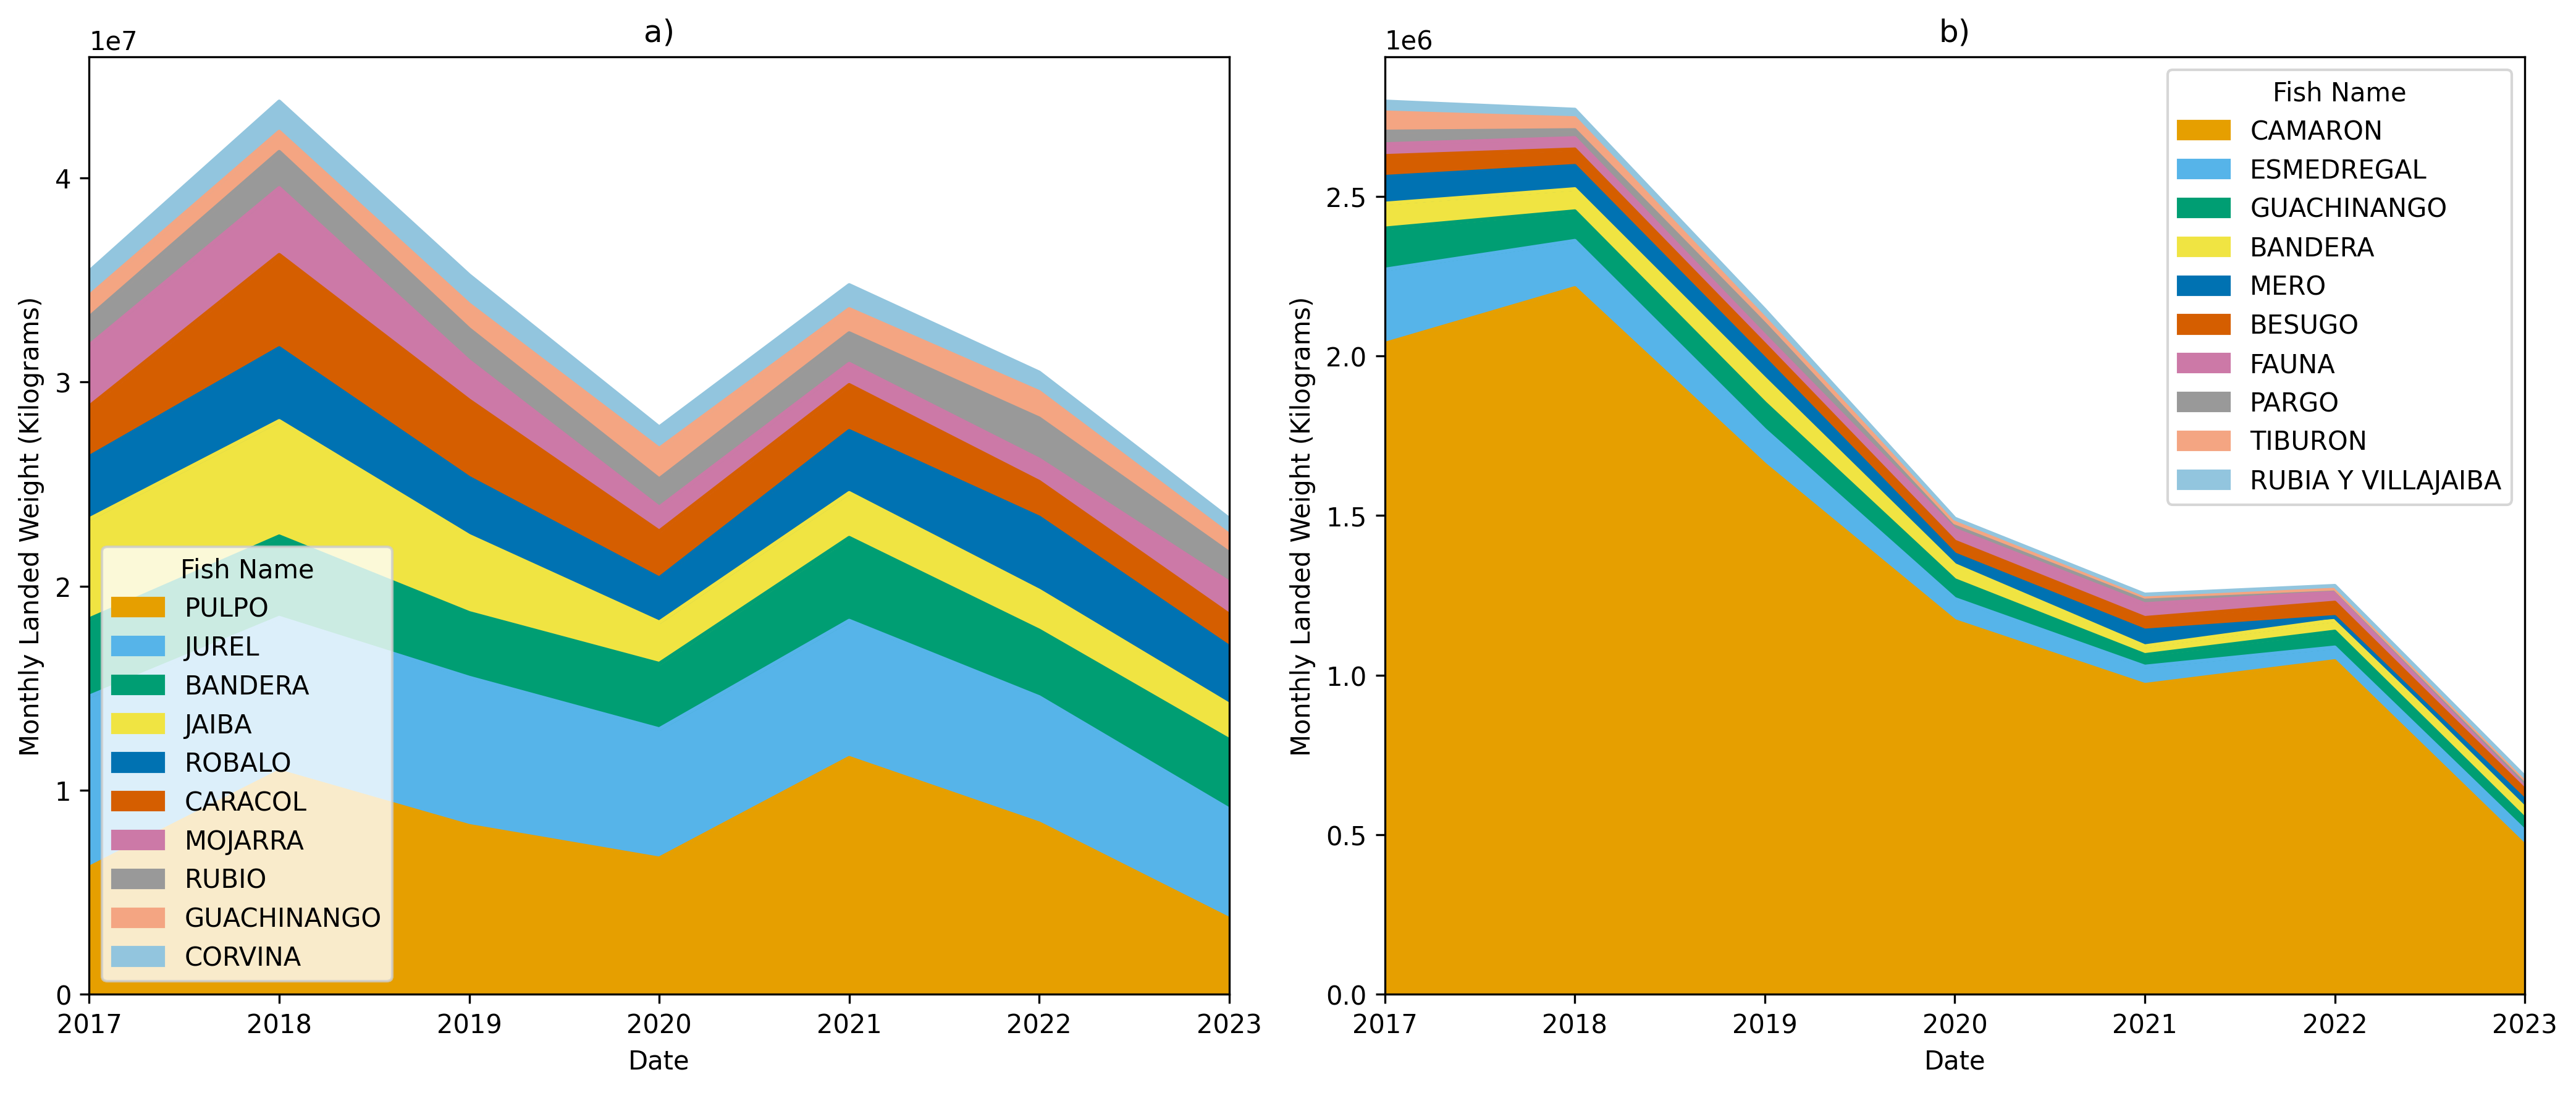

In [14]:
#Time series Catches

# Rename the column before any operations
df1.rename(columns={'NOMBRE PRINCIPAL': 'Fish Name'}, inplace=True)

# Preprocess the first dataframe
df1['FECHA AVISO'] = pd.to_datetime(df1['FECHA AVISO'], format='%d/%m/%Y')
df1['YEAR'] = df1['FECHA AVISO'].dt.year
df1['MONTH'] = df1['FECHA AVISO'].dt.month
df1 = df1[df1['YEAR'] != 2016]
df1 = df1[(df1['Fish Name'] != 'OSTION')|(df1['Fish Name'] != 'OTRAS')]
df1['NOMBRE OFICINA'] = df1['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')
df1['Value (MXN)'] = df1['PESO DESEMBARCADO_KILOGRAMOS'] * df1['PRECIO_PESOS']

# Identify top 10 species by volume and value
by_volume1 = df1.groupby('Fish Name')['PESO DESEMBARCADO_KILOGRAMOS'].sum()
by_value1 = df1.groupby('Fish Name')['Value (MXN)'].sum()
by_frequency1 = df1[df1['Fish Name'].isin(by_volume1.index)]['Fish Name'].value_counts()

# Calculate percentages
total_volume1 = df1['PESO DESEMBARCADO_KILOGRAMOS'].sum()
total_value1 = df1['Value (MXN)'].sum()
total_reports1 = len(df1)

percent_volume1 = by_volume1 / total_volume1 * 100
percent_value1 = by_value1 / total_value1 * 100
percent_frequency1 = by_frequency1 / total_reports1 * 100

# Create DataFrame for percentages and IIR
iir_df1 = pd.DataFrame({
    'Fish Name': by_volume1.index,
    '% Capture': percent_volume1.values,
    '% Value': percent_value1.reindex(by_volume1.index).values,
    '% Frequency': percent_frequency1.reindex(by_volume1.index).values
})

iir_df1['IIR'] = (iir_df1['% Capture'] + iir_df1['% Value'] + iir_df1['% Frequency']) / 3
iir_df1 = iir_df1.sort_values(by='IIR', ascending=False)

top_10_species_df1 = df1[df1['Fish Name'].isin(iir_df1['Fish Name'].head(10))]
monthly_df1 = top_10_species_df1.groupby([pd.Grouper(key='FECHA AVISO', freq='YE'), 'Fish Name'])['PESO DESEMBARCADO_KILOGRAMOS'].sum().unstack().fillna(0)
ordered_columns1 = monthly_df1.sum().sort_values(ascending=False).index
monthly_df1 = monthly_df1[ordered_columns1]

# Preprocess the second dataframe
df2.rename(columns={'NOMBRE PRINCIPAL': 'Fish Name'}, inplace=True)
df2 = df2[(df2['NOMBRE ESTADO'] == 'TABASCO') | (df2['NOMBRE ESTADO'] == 'CAMPECHE')]
df2['FECHA AVISO'] = pd.to_datetime(df2['FECHA AVISO'], format='%d/%m/%Y')
df2['YEAR'] = df2['FECHA AVISO'].dt.year
df2['MONTH'] = df2['FECHA AVISO'].dt.month
df2 = df2[df2['YEAR'] != 2016]
df2 = df2[(df2['Fish Name'] != 'OSTION')|(df2['Fish Name'] != 'OTRAS')]
df2['NOMBRE OFICINA'] = df2['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')
df2['Value (MXN)'] = df2['PESO DESEMBARCADO_KILOGRAMOS'] * df2['PRECIO_PESOS']

# Identify top 10 species by volume and value
by_volume2 = df2.groupby('Fish Name')['PESO DESEMBARCADO_KILOGRAMOS'].sum()
by_value2 = df2.groupby('Fish Name')['Value (MXN)'].sum()
by_frequency2 = df2[df2['Fish Name'].isin(by_volume2.index)]['Fish Name'].value_counts()

# Calculate percentages
total_volume2 = df2['PESO DESEMBARCADO_KILOGRAMOS'].sum()
total_value2 = df2['Value (MXN)'].sum()
total_reports2 = len(df2)

percent_volume2 = by_volume2 / total_volume2 * 100
percent_value2 = by_value2 / total_value2 * 100
percent_frequency2 = by_frequency2 / total_reports2 * 100

# Create DataFrame for percentages and IIR
iir_df2 = pd.DataFrame({
    'Fish Name': by_volume2.index,
    '% Capture': percent_volume2.values,
    '% Value': percent_value2.reindex(by_volume2.index).values,
    '% Frequency': percent_frequency2.reindex(by_volume2.index).values
})

iir_df2['IIR'] = (iir_df2['% Capture'] + iir_df2['% Value'] + iir_df2['% Frequency']) / 3
iir_df2 = iir_df2.sort_values(by='IIR', ascending=False)

top_10_species_df2 = df2[df2['Fish Name'].isin(iir_df2['Fish Name'].head(10))]
monthly_df2 = top_10_species_df2.groupby([pd.Grouper(key='FECHA AVISO', freq='YE'), 'Fish Name'])['PESO DESEMBARCADO_KILOGRAMOS'].sum().unstack().fillna(0)
ordered_columns2 = monthly_df2.sum().sort_values(ascending=False).index
monthly_df2 = monthly_df2[ordered_columns2]

# Plot the monthly time series with stacked areas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi=300)

monthly_df1.plot.area(stacked=True, color=custom_colors[:len(monthly_df1.columns)], ax=axes[0])
axes[0].set_title('a)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Monthly Landed Weight (Kilograms)')

monthly_df2.plot.area(stacked=True, color=custom_colors[:len(monthly_df2.columns)], ax=axes[1])
axes[1].set_title('b)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Monthly Landed Weight (Kilograms)')

plt.tight_layout()
plt.show()


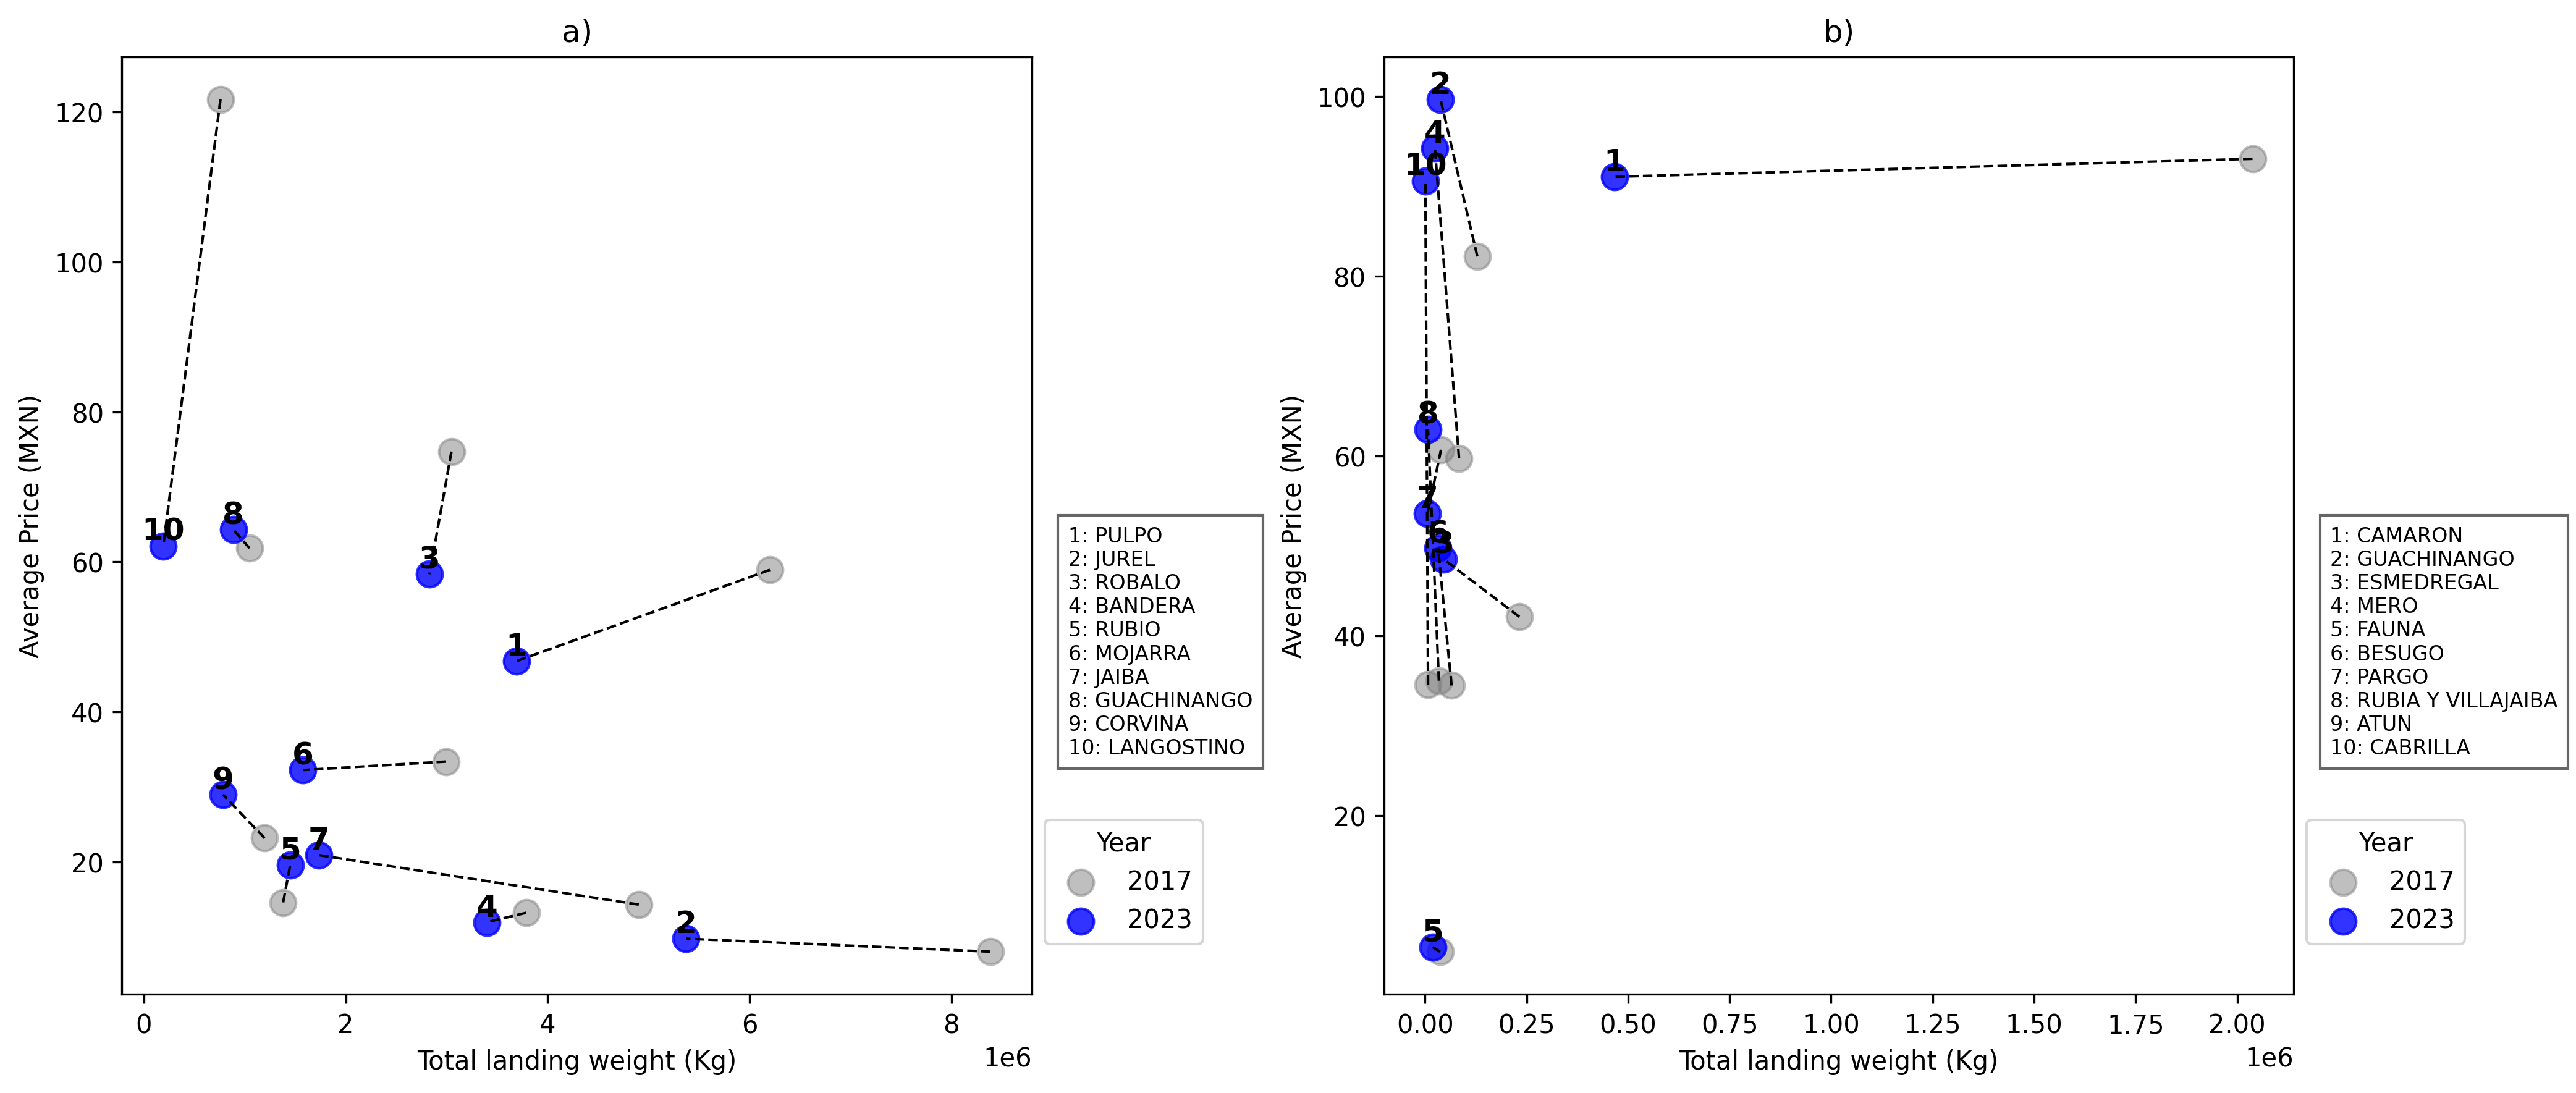

In [7]:
#Comparation by catch and prices between years 2017 and 2023


# Function to preprocess and calculate IIR for a given DataFrame


def preprocess_and_calculate_IIR(df, year_col='YEAR', fish_col='Fish Name', weight_col='PESO DESEMBARCADO_KILOGRAMOS', price_col='PRECIO_PESOS', date_col='FECHA AVISO'):
    df[date_col] = pd.to_datetime(df[date_col], format='%d/%m/%Y')
    df[year_col] = df[date_col].dt.year
    df['MONTH'] = df[date_col].dt.month
    # Calculate IIR for all species
    species_summary = df.groupby(fish_col).agg({
        weight_col: 'sum',
        price_col: 'mean',
        fish_col: 'count'
    }).rename(columns={
        weight_col: 'Total Peso Desembarcado (KG)',
        price_col: 'Precio Promedio (MXN)',
        fish_col: 'Frecuencia de Registro'
    }).reset_index()

    # Calculate IIR
    percent_volume = (species_summary['Total Peso Desembarcado (KG)'] / species_summary['Total Peso Desembarcado (KG)'].sum()) * 100
    percent_value = (species_summary['Precio Promedio (MXN)'] / species_summary['Precio Promedio (MXN)'].sum()) * 100
    percent_frequency = (species_summary['Frecuencia de Registro'] / species_summary['Frecuencia de Registro'].sum()) * 100
    species_summary['IIR'] = (percent_volume + percent_value + percent_frequency) / 3

    # Filter top 10 species by IIR and assign labels 1 to 10
    top_species_summary = species_summary.nlargest(10, 'IIR').reset_index(drop=True)
    top_species_summary['Label'] = range(1, 11)

    # Extract data for the years 2017 and 2023
    data_2017 = df[(df[year_col] == 2017) & (df[fish_col].isin(top_species_summary[fish_col]))]
    data_2023 = df[(df[year_col] == 2023) & (df[fish_col].isin(top_species_summary[fish_col]))]

    # Calculate summary statistics for 2017 and 2023
    summary_2017 = data_2017.groupby(fish_col).agg({
        weight_col: 'sum',
        price_col: 'mean'
    }).rename(columns={
        weight_col: 'Total Peso Desembarcado (KG) 2017',
        price_col: 'Precio Promedio (MXN) 2017'
    }).reset_index()

    summary_2023 = data_2023.groupby(fish_col).agg({
        weight_col: 'sum',
        price_col: 'mean'
    }).rename(columns={
        weight_col: 'Total Peso Desembarcado (KG) 2023',
        price_col: 'Precio Promedio (MXN) 2023'
    }).reset_index()

    # Merge 2017 and 2023 summaries
    merged_summary = pd.merge(summary_2017, summary_2023, on=fish_col, suffixes=('_2017', '_2023'))
    merged_summary = pd.merge(merged_summary, top_species_summary[[fish_col, 'Label']], on=fish_col)

    return merged_summary, top_species_summary

# Preprocess dataframes and calculate IIR
merged_summary1, top_species_summary1 = preprocess_and_calculate_IIR(df1)
merged_summary2, top_species_summary2 = preprocess_and_calculate_IIR(df2)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), dpi=300)

# Function to create the scatter plot for each DataFrame
def plot_scatter(ax, merged_summary, top_species_summary, title):
    for i, row in merged_summary.iterrows():
        ax.scatter(row['Total Peso Desembarcado (KG) 2017'], row['Precio Promedio (MXN) 2017'], color='gray', alpha=0.5, marker='o', s=100, label='2017' if i == 0 else "")
        ax.scatter(row['Total Peso Desembarcado (KG) 2023'], row['Precio Promedio (MXN) 2023'], color='blue', alpha=0.8, marker='o', s=100, label='2023' if i == 0 else "")
        ax.plot([row['Total Peso Desembarcado (KG) 2017'], row['Total Peso Desembarcado (KG) 2023']], 
                [row['Precio Promedio (MXN) 2017'], row['Precio Promedio (MXN) 2023']], 
                'k--', lw=1)
        ax.text(row['Total Peso Desembarcado (KG) 2023'], row['Precio Promedio (MXN) 2023'], str(row['Label']),
                 fontsize=12, ha='center', va='bottom', color='black', fontweight='bold')

    # Add species list with codes as a legend
    legend_text = "\n".join([f"{row['Label']}: {row['Fish Name']}" for i, row in top_species_summary.iterrows()])
    ax.text(1.04, 0.5, legend_text, transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    # Add labels and title
    ax.set_xlabel('Total landing weight (Kg)')
    ax.set_ylabel('Average Price (MXN)')
    ax.set_title(title)
    
    # Add legend for years outside the plot
    ax.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 0.2))

# Plot the data
plot_scatter(axes[0], merged_summary1, top_species_summary1, 'a)')
plot_scatter(axes[1], merged_summary2, top_species_summary2, 'b)')

plt.tight_layout()
plt.show()


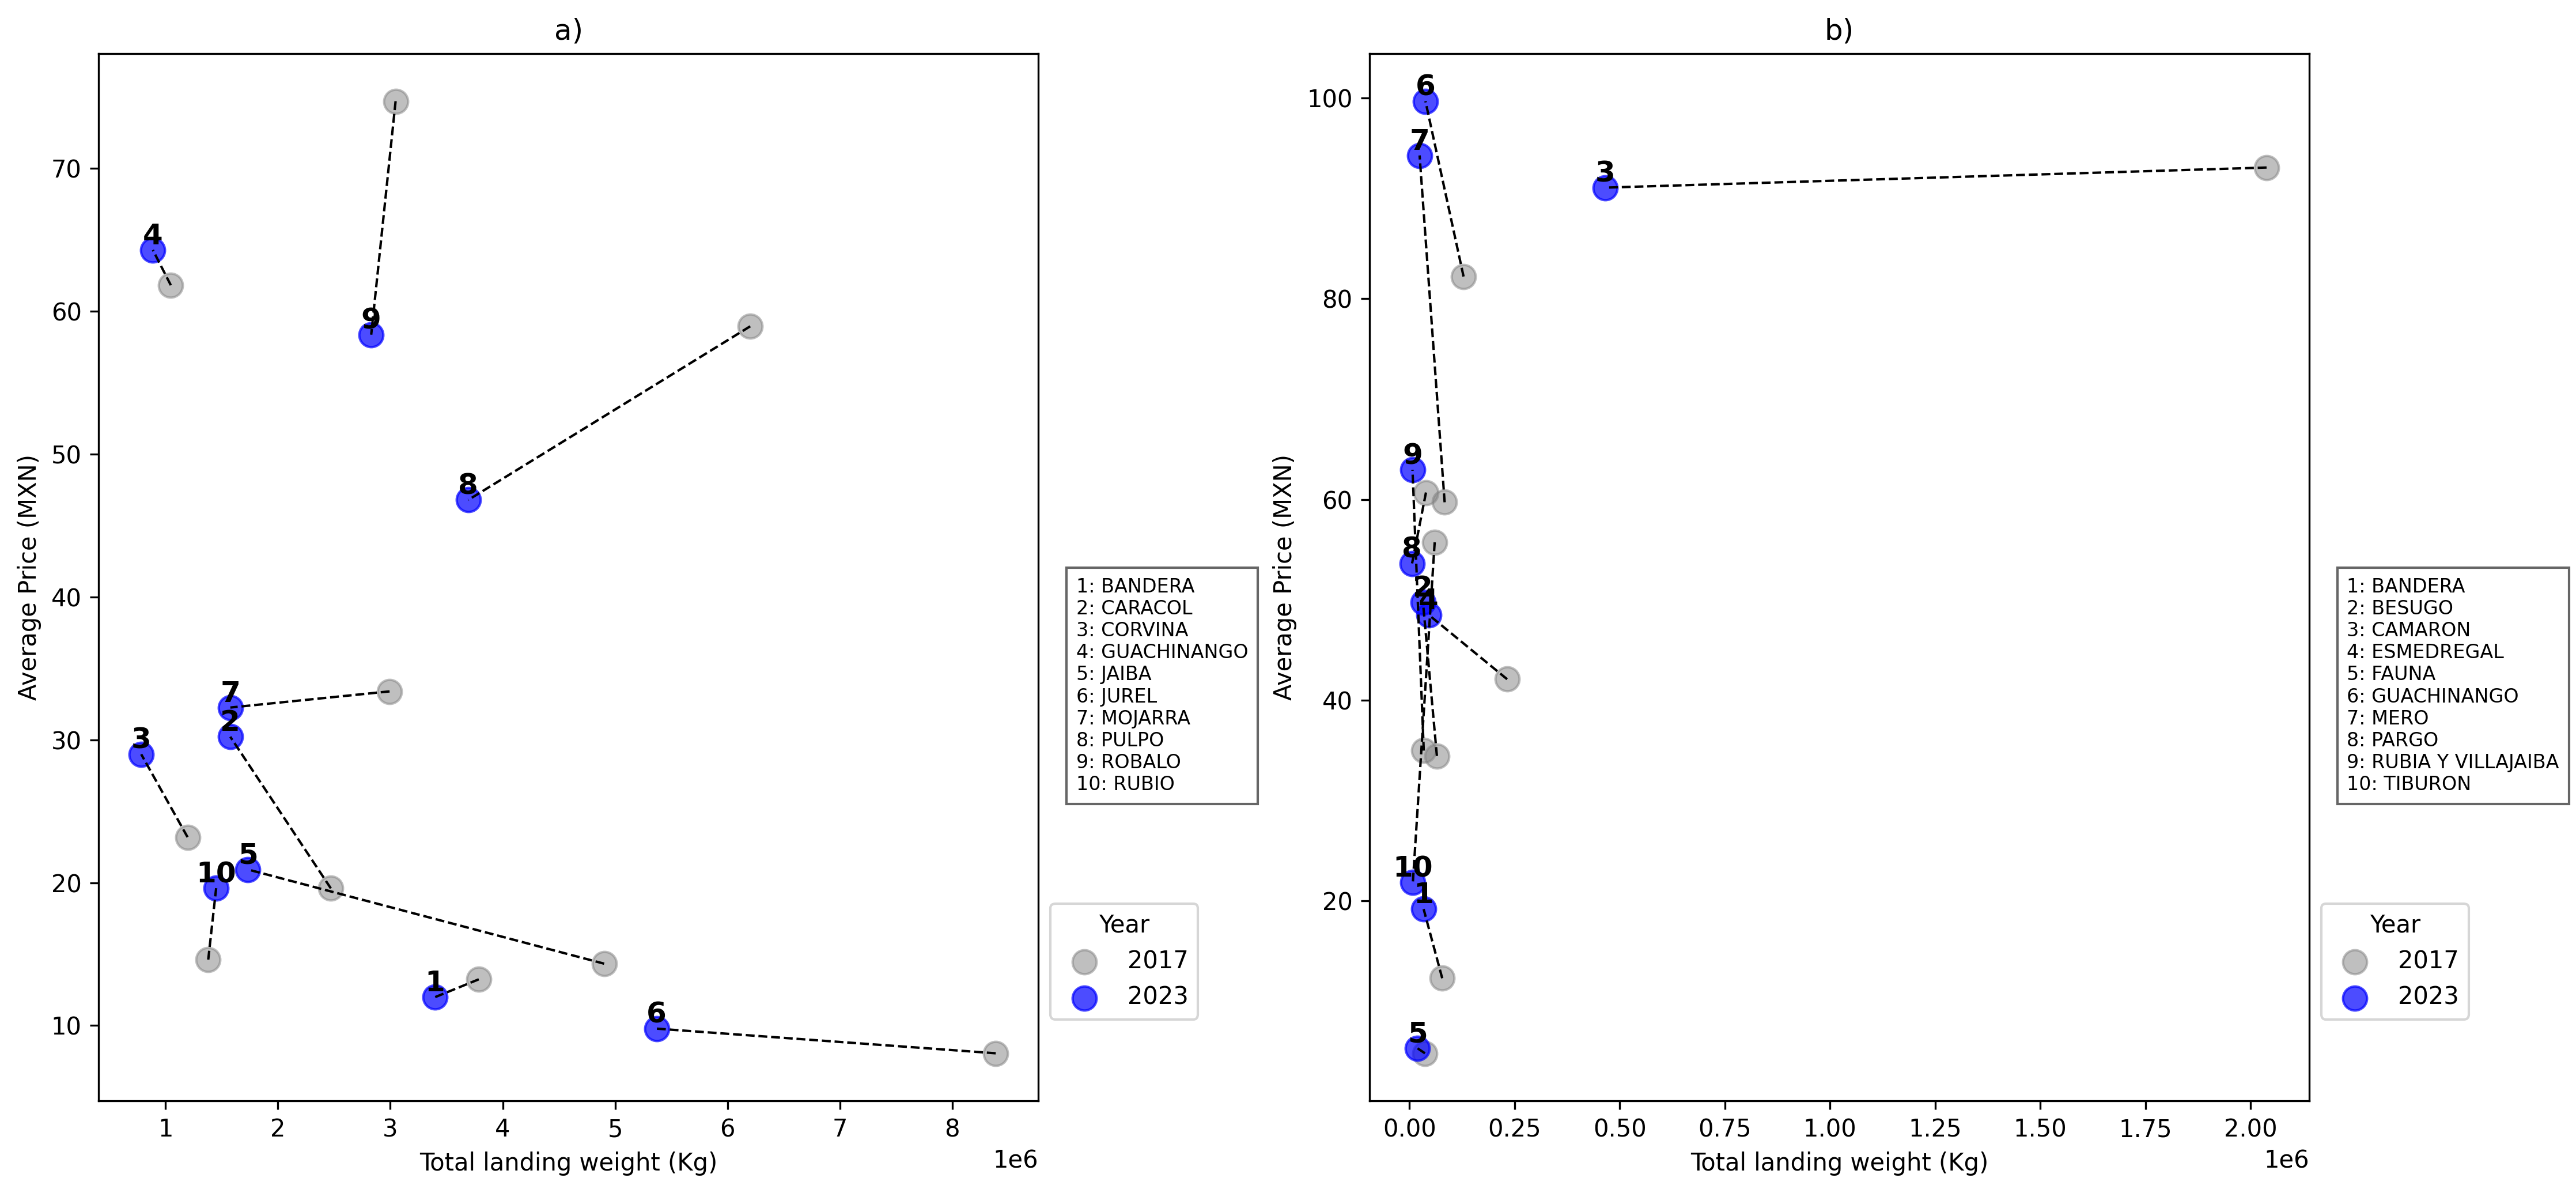

In [8]:
def preprocess_and_calculate_changes(df, species_list, year_col='YEAR', fish_col='Fish Name', weight_col='PESO DESEMBARCADO_KILOGRAMOS', price_col='PRECIO_PESOS', date_col='FECHA AVISO'):
    df[date_col] = pd.to_datetime(df[date_col], format='%d/%m/%Y')
    df[year_col] = df[date_col].dt.year
    df['MONTH'] = df[date_col].dt.month
    df = df[df[year_col] != 2016]
    df = df[df[fish_col] != 'OSTION']
    df['NOMBRE OFICINA'] = df['NOMBRE OFICINA'].replace('SANCHEZ MAGALLANES', 'SANCHEZ MAGALLANEZ')
    df['Value (MXN)'] = df[weight_col] * df[price_col]

    # Extract data for the years 2017 and 2023
    data_2017 = df[(df[year_col] == 2017) & (df[fish_col].isin(species_list))]
    data_2023 = df[(df[year_col] == 2023) & (df[fish_col].isin(species_list))]

    # Calculate summary statistics for 2017 and 2023
    summary_2017 = data_2017.groupby(fish_col).agg({
        weight_col: 'sum',
        price_col: 'mean'
    }).rename(columns={
        weight_col: 'Total Peso Desembarcado (KG) 2017',
        price_col: 'Precio Promedio (MXN) 2017'
    }).reset_index()

    summary_2023 = data_2023.groupby(fish_col).agg({
        weight_col: 'sum',
        price_col: 'mean'
    }).rename(columns={
        weight_col: 'Total Peso Desembarcado (KG) 2023',
        price_col: 'Precio Promedio (MXN) 2023'
    }).reset_index()

    # Merge 2017 and 2023 summaries
    merged_summary = pd.merge(summary_2017, summary_2023, on=fish_col, suffixes=('_2017', '_2023'))

    # Calculate percentage differences
    merged_summary['Percentage Change in Weight (KG)'] = ((merged_summary['Total Peso Desembarcado (KG) 2023'] - merged_summary['Total Peso Desembarcado (KG) 2017']) / merged_summary['Total Peso Desembarcado (KG) 2017']) * 100
    merged_summary['Percentage Change in Price (MXN)'] = ((merged_summary['Precio Promedio (MXN) 2023'] - merged_summary['Precio Promedio (MXN) 2017']) / merged_summary['Precio Promedio (MXN) 2017']) * 100

    # Assign numeric labels to each species
    merged_summary['Label'] = range(1, len(merged_summary) + 1)

    return merged_summary


# Preprocess dataframes and calculate changes
merged_summary1 = preprocess_and_calculate_changes(df1, top_10_iir_df1_list)
merged_summary2 = preprocess_and_calculate_changes(df2, top_10_iir_df2_list)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=300)

# Function to create the scatter plot for each DataFrame
def plot_scatter(ax, merged_summary, title):
    for i, row in merged_summary.iterrows():
        ax.scatter(row['Total Peso Desembarcado (KG) 2017'], row['Precio Promedio (MXN) 2017'], color='gray', alpha=0.5, marker='o', s=100, label='2017' if i == 0 else "")
        ax.scatter(row['Total Peso Desembarcado (KG) 2023'], row['Precio Promedio (MXN) 2023'], color='blue', alpha=0.7, marker='o', s=100, label='2023' if i == 0 else "")
        ax.plot([row['Total Peso Desembarcado (KG) 2017'], row['Total Peso Desembarcado (KG) 2023']], 
                [row['Precio Promedio (MXN) 2017'], row['Precio Promedio (MXN) 2023']], 
                'k--', lw=1)
        ax.text(row['Total Peso Desembarcado (KG) 2023'], row['Precio Promedio (MXN) 2023'], str(row['Label']),
                 fontsize=12, ha='center', va='bottom', color='black', fontweight='bold')

    # Add species list with codes as a legend
    legend_text = "\n".join([f"{row['Label']}: {row['Fish Name']}" for i, row in merged_summary.iterrows()])
    ax.text(1.04, 0.5, legend_text, transform=ax.transAxes, fontsize=8, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    # Add labels and title
    ax.set_xlabel('Total landing weight (Kg)')
    ax.set_ylabel('Average Price (MXN)')
    ax.set_title(title)
    
    # Add legend for years outside the plot
    ax.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 0.2))

# Plot the data
plot_scatter(axes[0], merged_summary1, 'a)')
plot_scatter(axes[1], merged_summary2, 'b)')

plt.tight_layout()
plt.show()

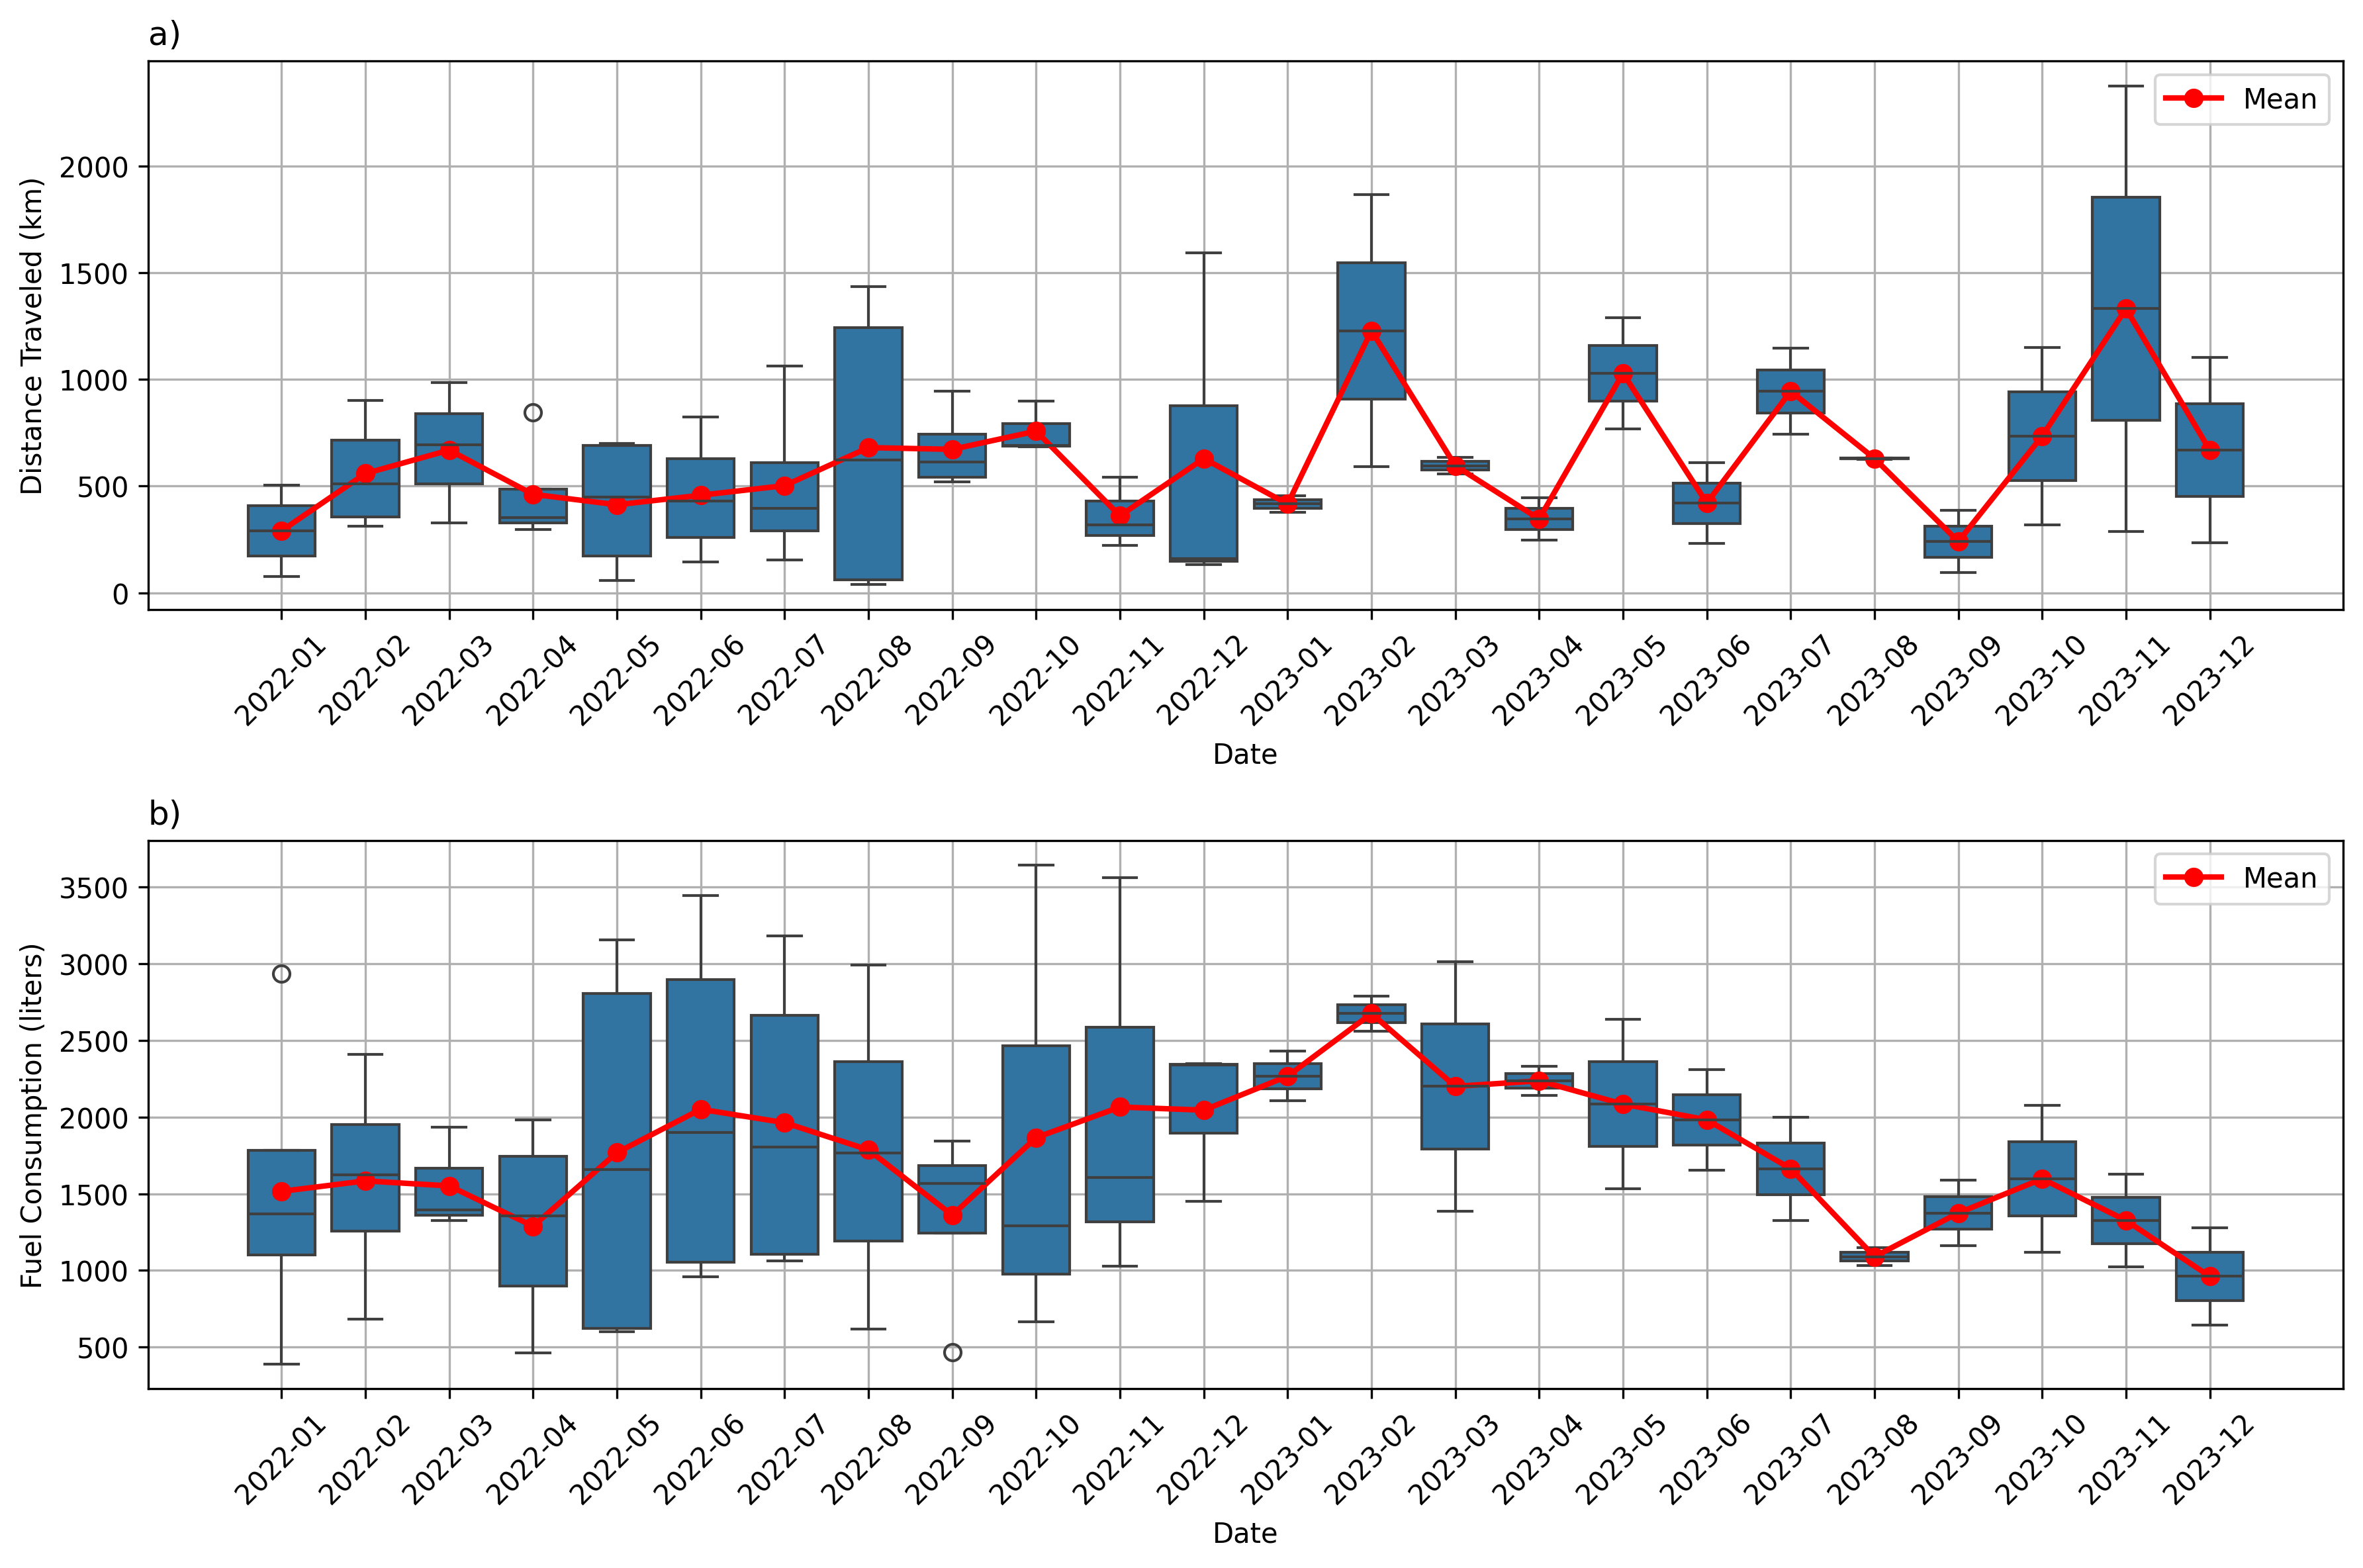

In [9]:
# Small scale fleet with Nemos analisys

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('vms_flota_nemo.csv', low_memory=False)

# Convert date and time columns to datetime
df['Guardar_Marca'] = pd.to_datetime(df['Guardar_Marca'], errors='coerce')

# Filter points with speed equal to 0
df = df[df['Etapa_Viaje'] != 'Amarre']

# Sort the data by vessel and time
df = df.sort_values(by=['Nombre_Embarcacion', 'Guardar_Marca'])

# Create a geometry column from longitude and latitude columns
df['geometry'] = [Point(xy) for xy in zip(df.Longitud, df.Latitud)]
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Calculate the distance between consecutive points in time for each vessel
def calculate_distance(row):
    if pd.isnull(row['Latitud_prev']) or pd.isnull(row['Longitud_prev']):
        return 0
    return geodesic((row['Latitud'], row['Longitud']), (row['Latitud_prev'], row['Longitud_prev'])).km

# Shift the coordinates and time to get the previous point and time
gdf['Latitud_prev'] = gdf.groupby('Nombre_Embarcacion')['Latitud'].shift()
gdf['Longitud_prev'] = gdf.groupby('Nombre_Embarcacion')['Longitud'].shift()
gdf['Guardar_Marca_prev'] = gdf.groupby('Nombre_Embarcacion')['Guardar_Marca'].shift()

# Apply the distance calculation
gdf['Distancia_km'] = gdf.apply(calculate_distance, axis=1)

# Calculate the time difference in hours
gdf['Tiempo_horas'] = (gdf['Guardar_Marca'] - gdf['Guardar_Marca_prev']).dt.total_seconds() / 3600

# Replace NaN in distance and time columns with 0
gdf['Distancia_km'] = gdf['Distancia_km'].fillna(0)
gdf['Tiempo_horas'] = gdf['Tiempo_horas'].fillna(0)

# Calculate fuel consumption (liters) based on engine power and operation time

liters_per_hour = 36.9
# engine_power_hp = 100

gdf['Consumo_litros'] = gdf['Tiempo_horas'] * liters_per_hour
# Identify and remove outliers in fuel consumption
# Here, an outlier is defined as any value above the 99th percentile
q_upper = gdf['Consumo_litros'].quantile(0.99)
gdf = gdf[gdf['Consumo_litros'] <= q_upper]

# Create a year-month column
gdf['YearMonth'] = gdf['Guardar_Marca'].dt.to_period('M')

# Calculate the total distance traveled, fuel consumption, and hours at sea monthly for each vessel
monthly_distance_fuel = gdf.groupby(['Nombre_Embarcacion', 'YearMonth']).agg({
    'Distancia_km': 'sum',
    'Consumo_litros': 'sum',
    'Tiempo_horas': 'sum'
}).reset_index()

# Calculate the monthly averages of distance traveled, fuel consumption, and time at sea
mean_distance = monthly_distance_fuel.groupby('YearMonth')['Distancia_km'].mean()
mean_fuel = monthly_distance_fuel.groupby('YearMonth')['Consumo_litros'].mean()

# Plot the boxplots in a single figure
fig, axes = plt.subplots(2, 1, figsize=(12, 8), dpi=300)

# Plot a boxplot of the monthly distance traveled for all vessels
sns.boxplot(ax=axes[0], x='YearMonth', y='Distancia_km', data=monthly_distance_fuel)
axes[0].plot(mean_distance.index.astype(str), mean_distance.values, color='red', marker='o', linestyle='-', linewidth=2, label='Mean')
axes[0].set_title('a)', loc='left')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Distance Traveled (km)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)
axes[0].legend()

# Plot a boxplot of the monthly fuel consumption for all vessels
sns.boxplot(ax=axes[1], x='YearMonth', y='Consumo_litros', data=monthly_distance_fuel)
axes[1].plot(mean_fuel.index.astype(str), mean_fuel.values, color='red', marker='o', linestyle='-', linewidth=2, label='Mean')
axes[1].set_title('b)', loc='left')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Fuel Consumption (liters)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)
axes[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



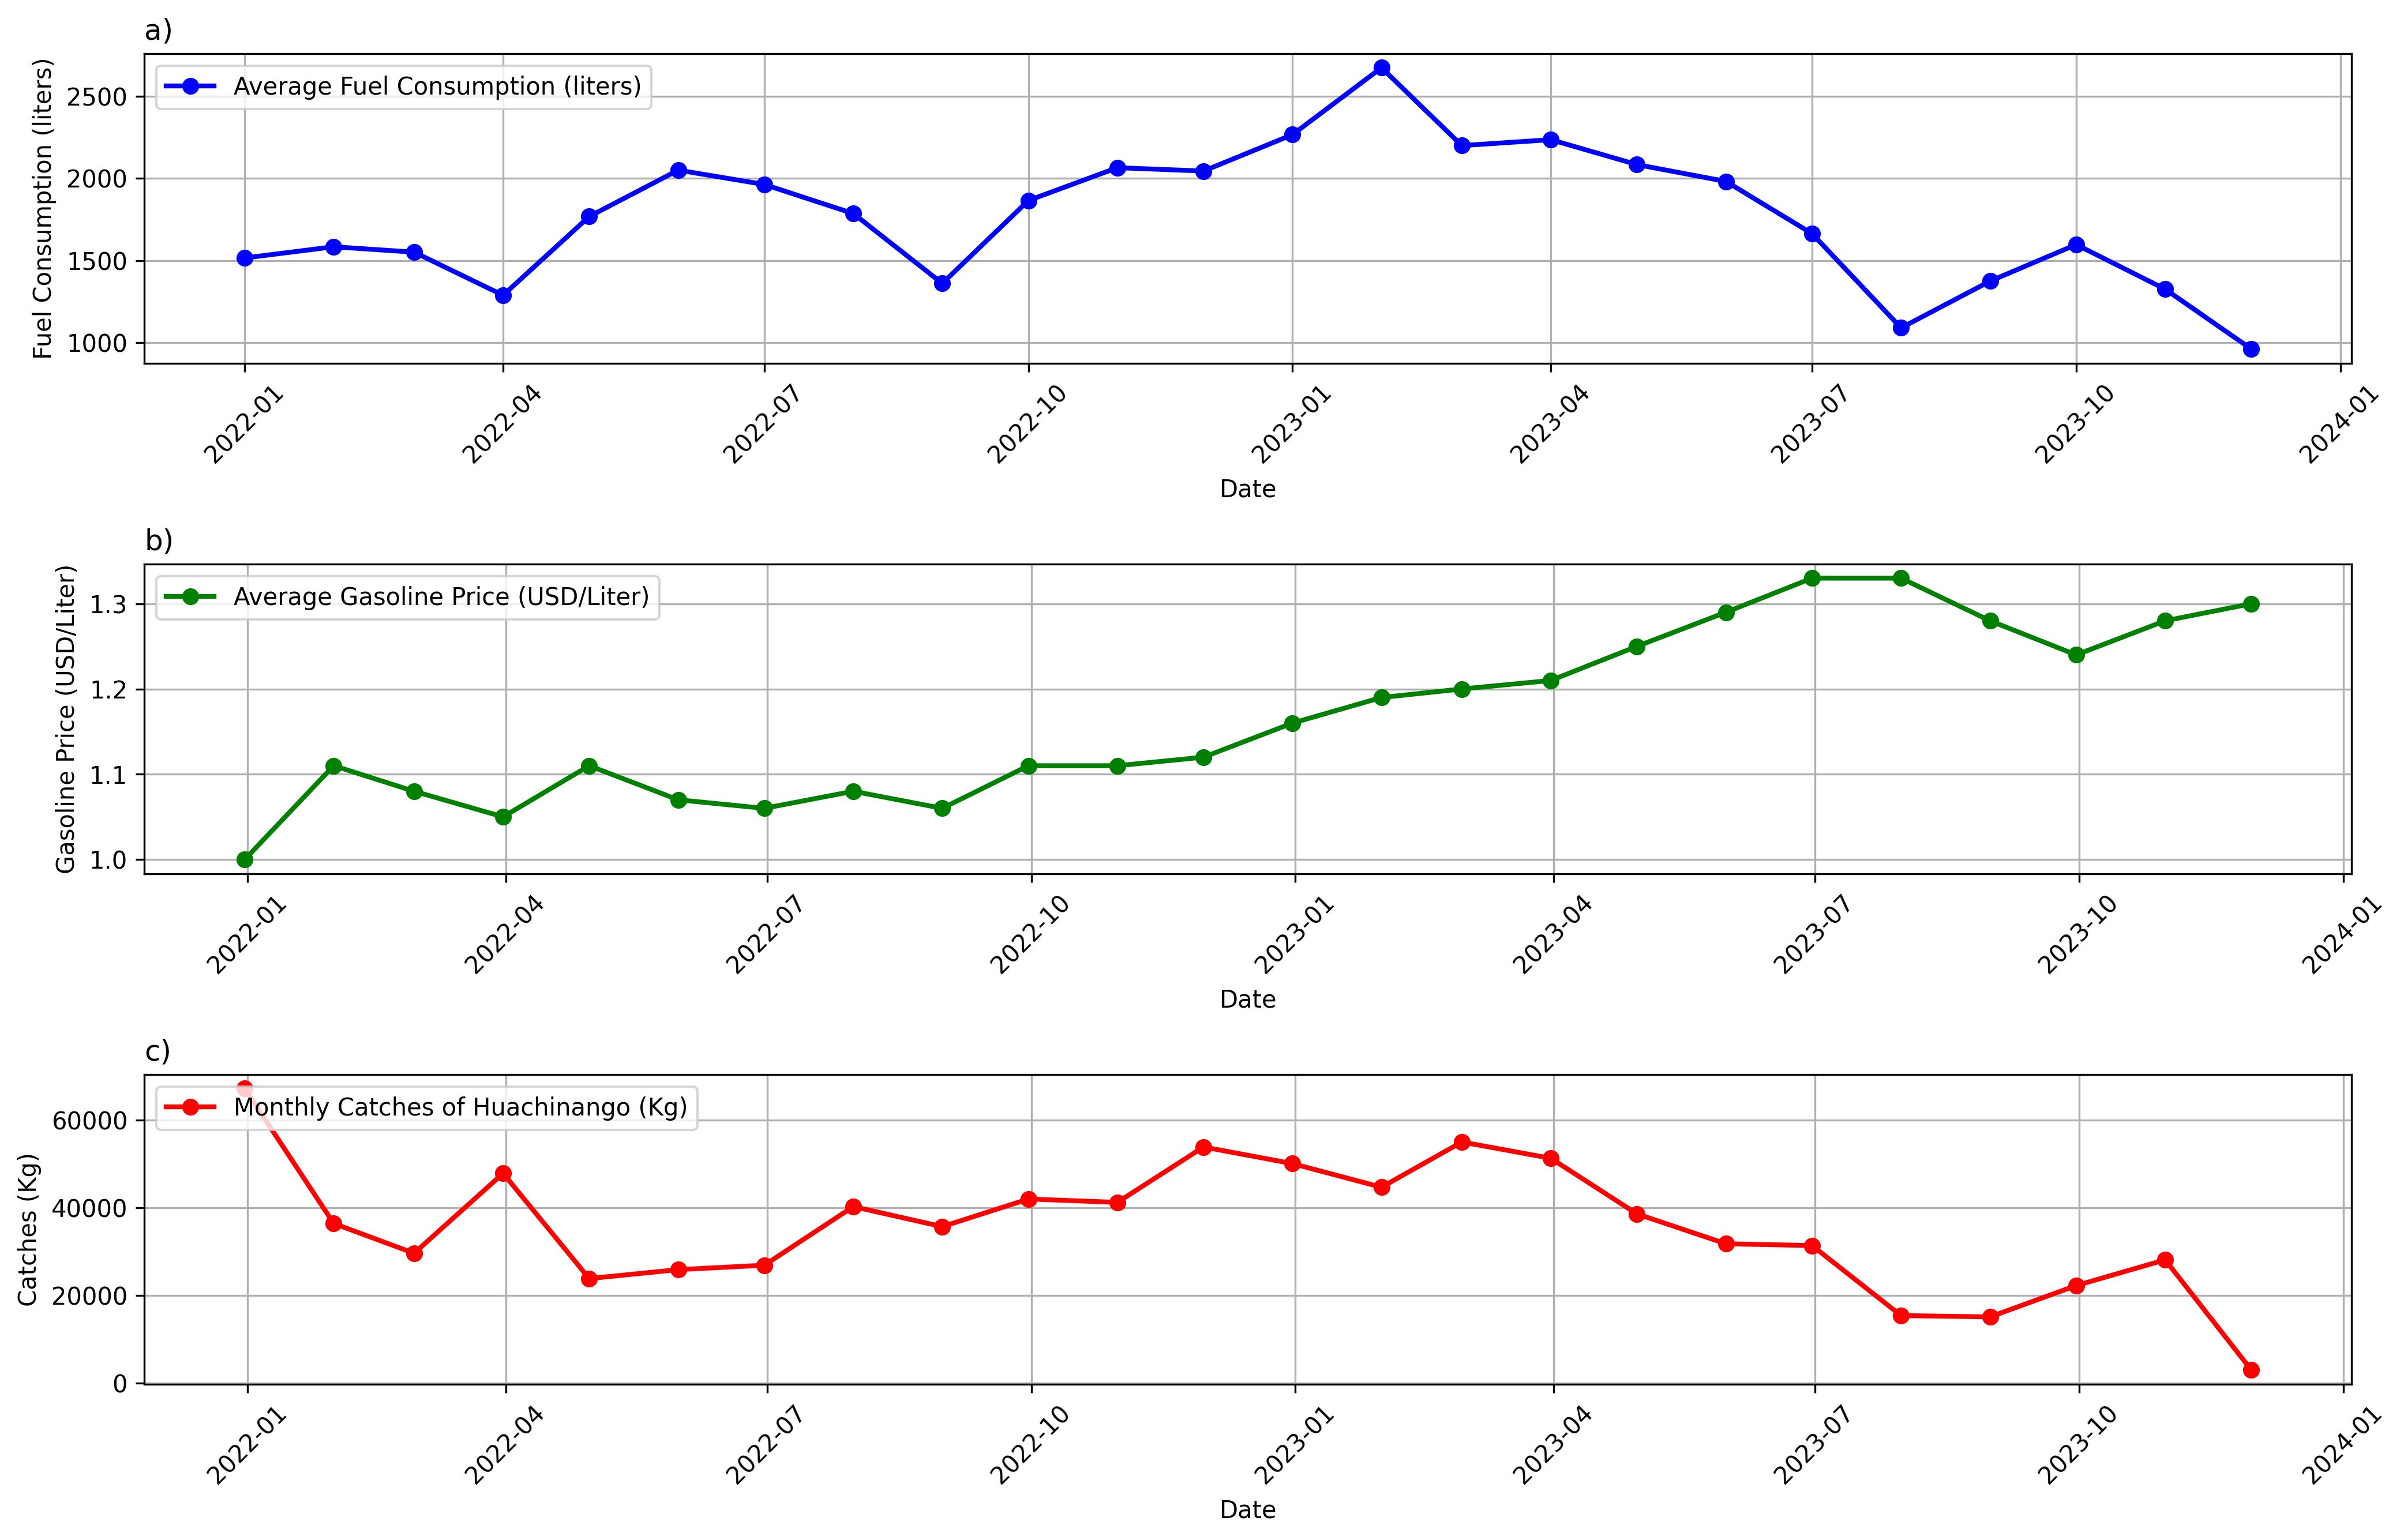

In [10]:
# Fuel consumtion rate estimation
import geopandas as gpd
from shapely.geometry import Point
from geopy.distance import geodesic
import seaborn as sns


# Filtrar los datos por las condiciones especificadas
filtered_df = df1[
    (df1['Fish Name'] == 'GUACHINANGO') & 
    (df1['NOMBRE OFICINA'] == 'FRONTERA') & 
    (df1['FECHA AVISO'] >= '2021-12-01') & 
    (df1['FECHA AVISO'] <= '2023-12-31')
]

# Agrupar los datos por año y mes, sumando el peso desembarcado
monthly_captures = filtered_df.resample('ME', on='FECHA AVISO')['PESO DESEMBARCADO_KILOGRAMOS'].sum().reset_index()

# Renombrar las columnas para mayor claridad
monthly_captures.rename(columns={'FECHA AVISO': 'Fecha', 'PESO DESEMBARCADO_KILOGRAMOS': 'Capturas Mensuales (KG)'}, inplace=True)



# Cargar el archivo CSV
df_vms = pd.read_csv('vms_flota_nemo.csv', low_memory=False)

# Convertir las columnas de fecha y hora a datetime
df_vms['Guardar_Marca'] = pd.to_datetime(df_vms['Guardar_Marca'], errors='coerce')

# Filtrar los puntos con velocidad igual a 0
df_vms = df_vms[df_vms['Etapa_Viaje'] != 'Amarre']

# Ordenar los datos por embarcación y tiempo
df_vms = df_vms.sort_values(by=['Nombre_Embarcacion', 'Guardar_Marca'])

# Crear una columna de geometría a partir de las columnas de longitud y latitud
df_vms['geometry'] = [Point(xy) for xy in zip(df_vms.Longitud, df_vms.Latitud)]
gdf = gpd.GeoDataFrame(df_vms, geometry='geometry')

# Calcular la distancia entre puntos consecutivos en el tiempo para cada embarcación
def calculate_distance(row):
    if pd.isnull(row['Latitud_prev']) or pd.isnull(row['Longitud_prev']):
        return 0
    return geodesic((row['Latitud'], row['Longitud']), (row['Latitud_prev'], row['Longitud_prev'])).km

# Shift the coordinates and time to get the previous point and time
gdf['Latitud_prev'] = gdf.groupby('Nombre_Embarcacion')['Latitud'].shift()
gdf['Longitud_prev'] = gdf.groupby('Nombre_Embarcacion')['Longitud'].shift()
gdf['Guardar_Marca_prev'] = gdf.groupby('Nombre_Embarcacion')['Guardar_Marca'].shift()

# Apply the distance calculation
gdf['Distancia_km'] = gdf.apply(calculate_distance, axis=1)

# Calculate the time difference in hours
gdf['Tiempo_horas'] = (gdf['Guardar_Marca'] - gdf['Guardar_Marca_prev']).dt.total_seconds() / 3600

# Reemplazar NaN en las columnas de distancia y tiempo con 0
gdf['Distancia_km'] = gdf['Distancia_km'].fillna(0)
gdf['Tiempo_horas'] = gdf['Tiempo_horas'].fillna(0)

# Calcular el consumo de gasolina (litros) basado en la potencia del motor y el tiempo de operación

liters_per_houriters = 36.9

gdf['Consumo_litros'] = gdf['Tiempo_horas'] * liters_per_hour

# Identificar y eliminar valores anómalos en el consumo de gasolina
# Aquí, se define como anómalo cualquier valor que esté por encima del percentil 99
q_upper = gdf['Consumo_litros'].quantile(0.99)
gdf = gdf[gdf['Consumo_litros'] <= q_upper]

# Crear una columna de año-mes
gdf['YearMonth'] = gdf['Guardar_Marca'].dt.to_period('M').dt.to_timestamp()

# Calcular la distancia total recorrida, el consumo de gasolina y las horas en el mar mensualmente por cada embarcación
distancia_consumo_mensual = gdf.groupby(['Nombre_Embarcacion', 'YearMonth']).agg({
    'Distancia_km': 'sum',
    'Consumo_litros': 'sum',
    'Tiempo_horas': 'sum'
}).reset_index()

# Calcular las medias mensuales de distancia recorrida, consumo de gasolina y tiempo en el mar
medias_distancia = distancia_consumo_mensual.groupby('YearMonth')['Distancia_km'].mean()
medias_consumo = distancia_consumo_mensual.groupby('YearMonth')['Consumo_litros'].mean()
medias_tiempo = distancia_consumo_mensual.groupby('YearMonth')['Tiempo_horas'].mean()

# Datos del precio de la gasolina en México (USD/Litro)
data_gas = {
    'Date': pd.date_range(start='2021-12-01', periods=24, freq='ME'),
    'Price (USD/Liter)': [1.00, 1.11, 1.08, 1.05, 1.11, 1.07, 1.06, 1.08, 1.06, 1.11, 1.11, 1.12,
                          1.16, 1.19, 1.20, 1.21, 1.25, 1.29, 1.33, 1.33, 1.28, 1.24, 1.28, 1.30]
}

df_gas = pd.DataFrame(data_gas)

# Asegurar que las fechas coinciden exactamente
medias_consumo = medias_consumo.reset_index()
medias_consumo['YearMonth'] = pd.to_datetime(medias_consumo['YearMonth'])
df_gas['Date'] = pd.to_datetime(df_gas['Date'])

# Crear la figura y los ejes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 9), dpi=300)

# Graficar el promedio de consumo de gasolina
ax1.plot(medias_consumo['YearMonth'], medias_consumo['Consumo_litros'], color='blue', marker='o', linestyle='-', linewidth=2, label='Average Fuel Consumption (liters)')
ax1.set_title('a)', loc='left')
ax1.set_xlabel('Date')
ax1.set_ylabel('Fuel Consumption (liters)')
ax1.legend(loc='upper left')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# Graficar el precio promedio de la gasolina
ax2.plot(df_gas['Date'], df_gas['Price (USD/Liter)'], color='green', marker='o', linestyle='-', linewidth=2, label='Average Gasoline Price (USD/Liter)')
ax2.set_title('b)', loc='left')
ax2.set_xlabel('Date')
ax2.set_ylabel('Gasoline Price (USD/Liter)')
ax2.legend(loc='upper left')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45)

# Graficar las capturas mensuales de Guachinango
ax3.plot(monthly_captures['Fecha'], monthly_captures['Capturas Mensuales (KG)'], color='red', marker='o', linestyle='-', linewidth=2, label='Monthly Catches of Huachinango (Kg)')
ax3.set_title('c)', loc='left')
ax3.set_xlabel('Date')
ax3.set_ylabel('Catches (Kg)')
ax3.legend(loc='upper left')
ax3.grid(True)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [11]:


# Filtrar los datos para los años 2017 y 2023
df_2017 = df1[df1['YEAR'] == 2017]
df_2023 = df1[df1['YEAR'] == 2023]

# Agregar los datos por localidad para 2017 y 2023
agg_2017 = df_2017.groupby('NOMBRE SITIO DESEMBARQUE')[['PESO DESEMBARCADO_KILOGRAMOS', 'PRECIO_PESOS']].sum().reset_index()
agg_2023 = df_2023.groupby('NOMBRE SITIO DESEMBARQUE')[['PESO DESEMBARCADO_KILOGRAMOS', 'PRECIO_PESOS']].sum().reset_index()

# Renombrar columnas para mayor claridad
agg_2017.columns = ['NOMBRE SITIO DESEMBARQUE', 'TOTAL_CAPTURAS_KG_2017', 'VALOR_TOTAL_PESOS_2017']
agg_2023.columns = ['NOMBRE SITIO DESEMBARQUE', 'TOTAL_CAPTURAS_KG_2023', 'VALOR_TOTAL_PESOS_2023']

# Unir los dataframes para comparar las capturas por localidad
comparison_by_location = pd.merge(agg_2017, agg_2023, on='NOMBRE SITIO DESEMBARQUE', how='outer')

# Ordenar el dataframe por capturas totales en 2017 y seleccionar las 10 localidades principales
top_10_locations = comparison_by_location.nlargest(10, 'TOTAL_CAPTURAS_KG_2017')

# Mostrar el dataframe resultante
top_10_locations

,NOMBRE SITIO DESEMBARQUE,TOTAL_CAPTURAS_KG_2017,VALOR_TOTAL_PESOS_2017,TOTAL_CAPTURAS_KG_2023,VALOR_TOTAL_PESOS_2023
122,MALECON SANSORES PEREZ,6090089.00,222494.5,4251596.0,122953.89
93,ISLA AGUADA,5812677.49,159881.0,846741.0,65008.70
118,MALECOM SEYBAPLAYA,4996014.00,256532.2,4341698.0,109972.50
228,SABANCUY,2782013.00,122415.0,2906613.0,140974.14
10,BARRA DE SAN PEDRO,2519981.00,137354.0,1377418.0,108765.64
94,ISLA ARENA,2114143.50,255649.0,2442913.0,212978.00
2,ARROYO GRANDE,2011198.00,349246.0,1181613.0,102289.33
36,COSTA BLANCA,1647333.00,67232.7,219016.0,4025.00
89,FRONTERA.,1419202.00,102443.0,1599990.0,53480.00
234,"SANCHEZ MAGALLANES ,TAB.",1241402.00,76443.3,1417715.0,71301.00


c:\Users\ricar\anaconda3\envs\pro24\Lib\site-packages\cartopy\mpl\geoaxes.py:395: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


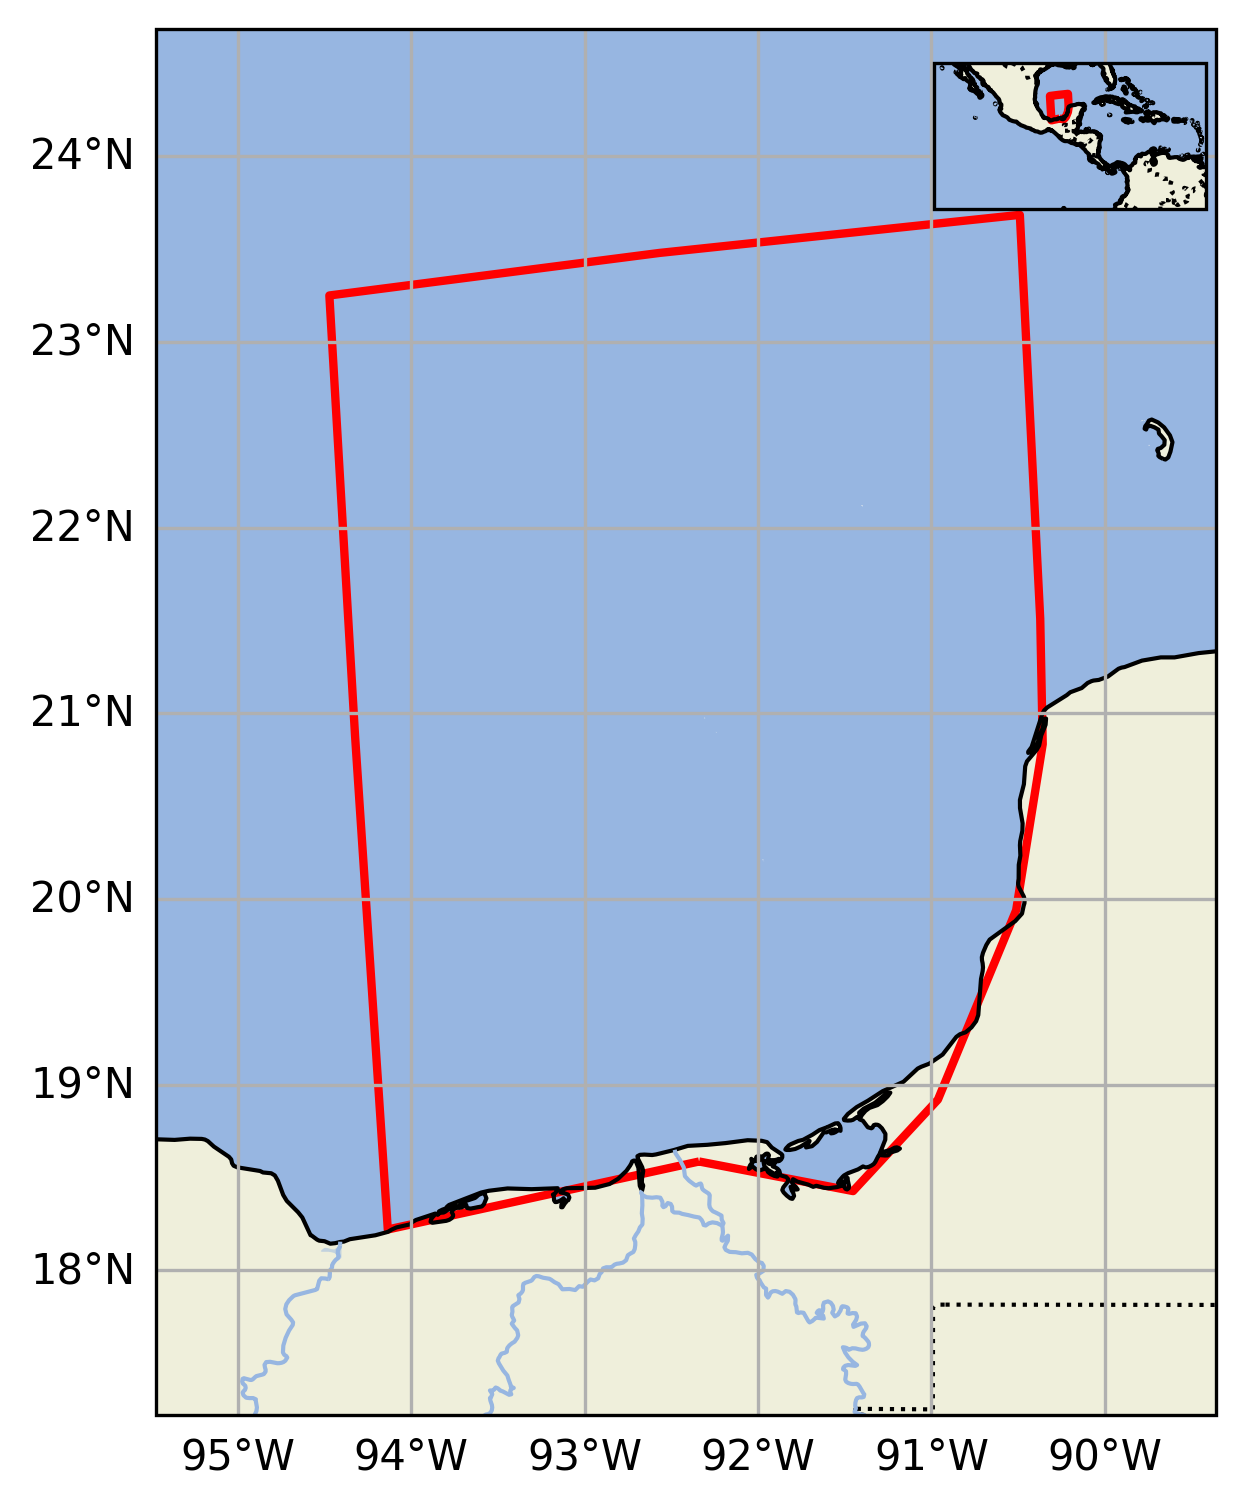

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Read the CSV file
vertices_df = pd.read_csv('vms_vertices.csv')

# Create a list of tuples (Longitude, Latitude) for the polygon vertices
polygon_points = [(row['Longitud'], row['Latitud']) for index, row in vertices_df.iterrows()]

# Create a Polygon object with the points
study_area_polygon = Polygon(polygon_points)

# Create a GeoDataFrame with the polygon
gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[study_area_polygon])

# Create the main map
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# Add the study area polygon
gdf.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Set the map extent based on the polygon bounds
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_extent([minx - 1, maxx + 1, miny - 1, maxy + 1], crs=ccrs.PlateCarree())

# Add gridlines and labels
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# Add title
#plt.title('Study Area Location Map')

# Create the inset map for macrolocation in the top right corner, 10% larger
ax_inset = inset_axes(ax, width="80%", height="70%", loc='upper right', 
                      bbox_to_anchor=(0.69, 0.73, 0.32, 0.32), bbox_transform=ax.transAxes,
                      axes_class=GeoAxes, axes_kwargs=dict(map_projection=ccrs.PlateCarree()))


# Add features to the inset map
ax_inset.add_feature(cfeature.LAND)
ax_inset.add_feature(cfeature.OCEAN)
ax_inset.add_feature(cfeature.COASTLINE)
ax_inset.add_feature(cfeature.BORDERS, linestyle=':')
ax_inset.set_extent([-120, -60, 0, 30], crs=ccrs.PlateCarree())  # Extent to cover the study area and more

# Add the study area polygon to the inset map
gdf.plot(ax=ax_inset, facecolor='none', edgecolor='red', linewidth=2)

# Show the map
plt.show()

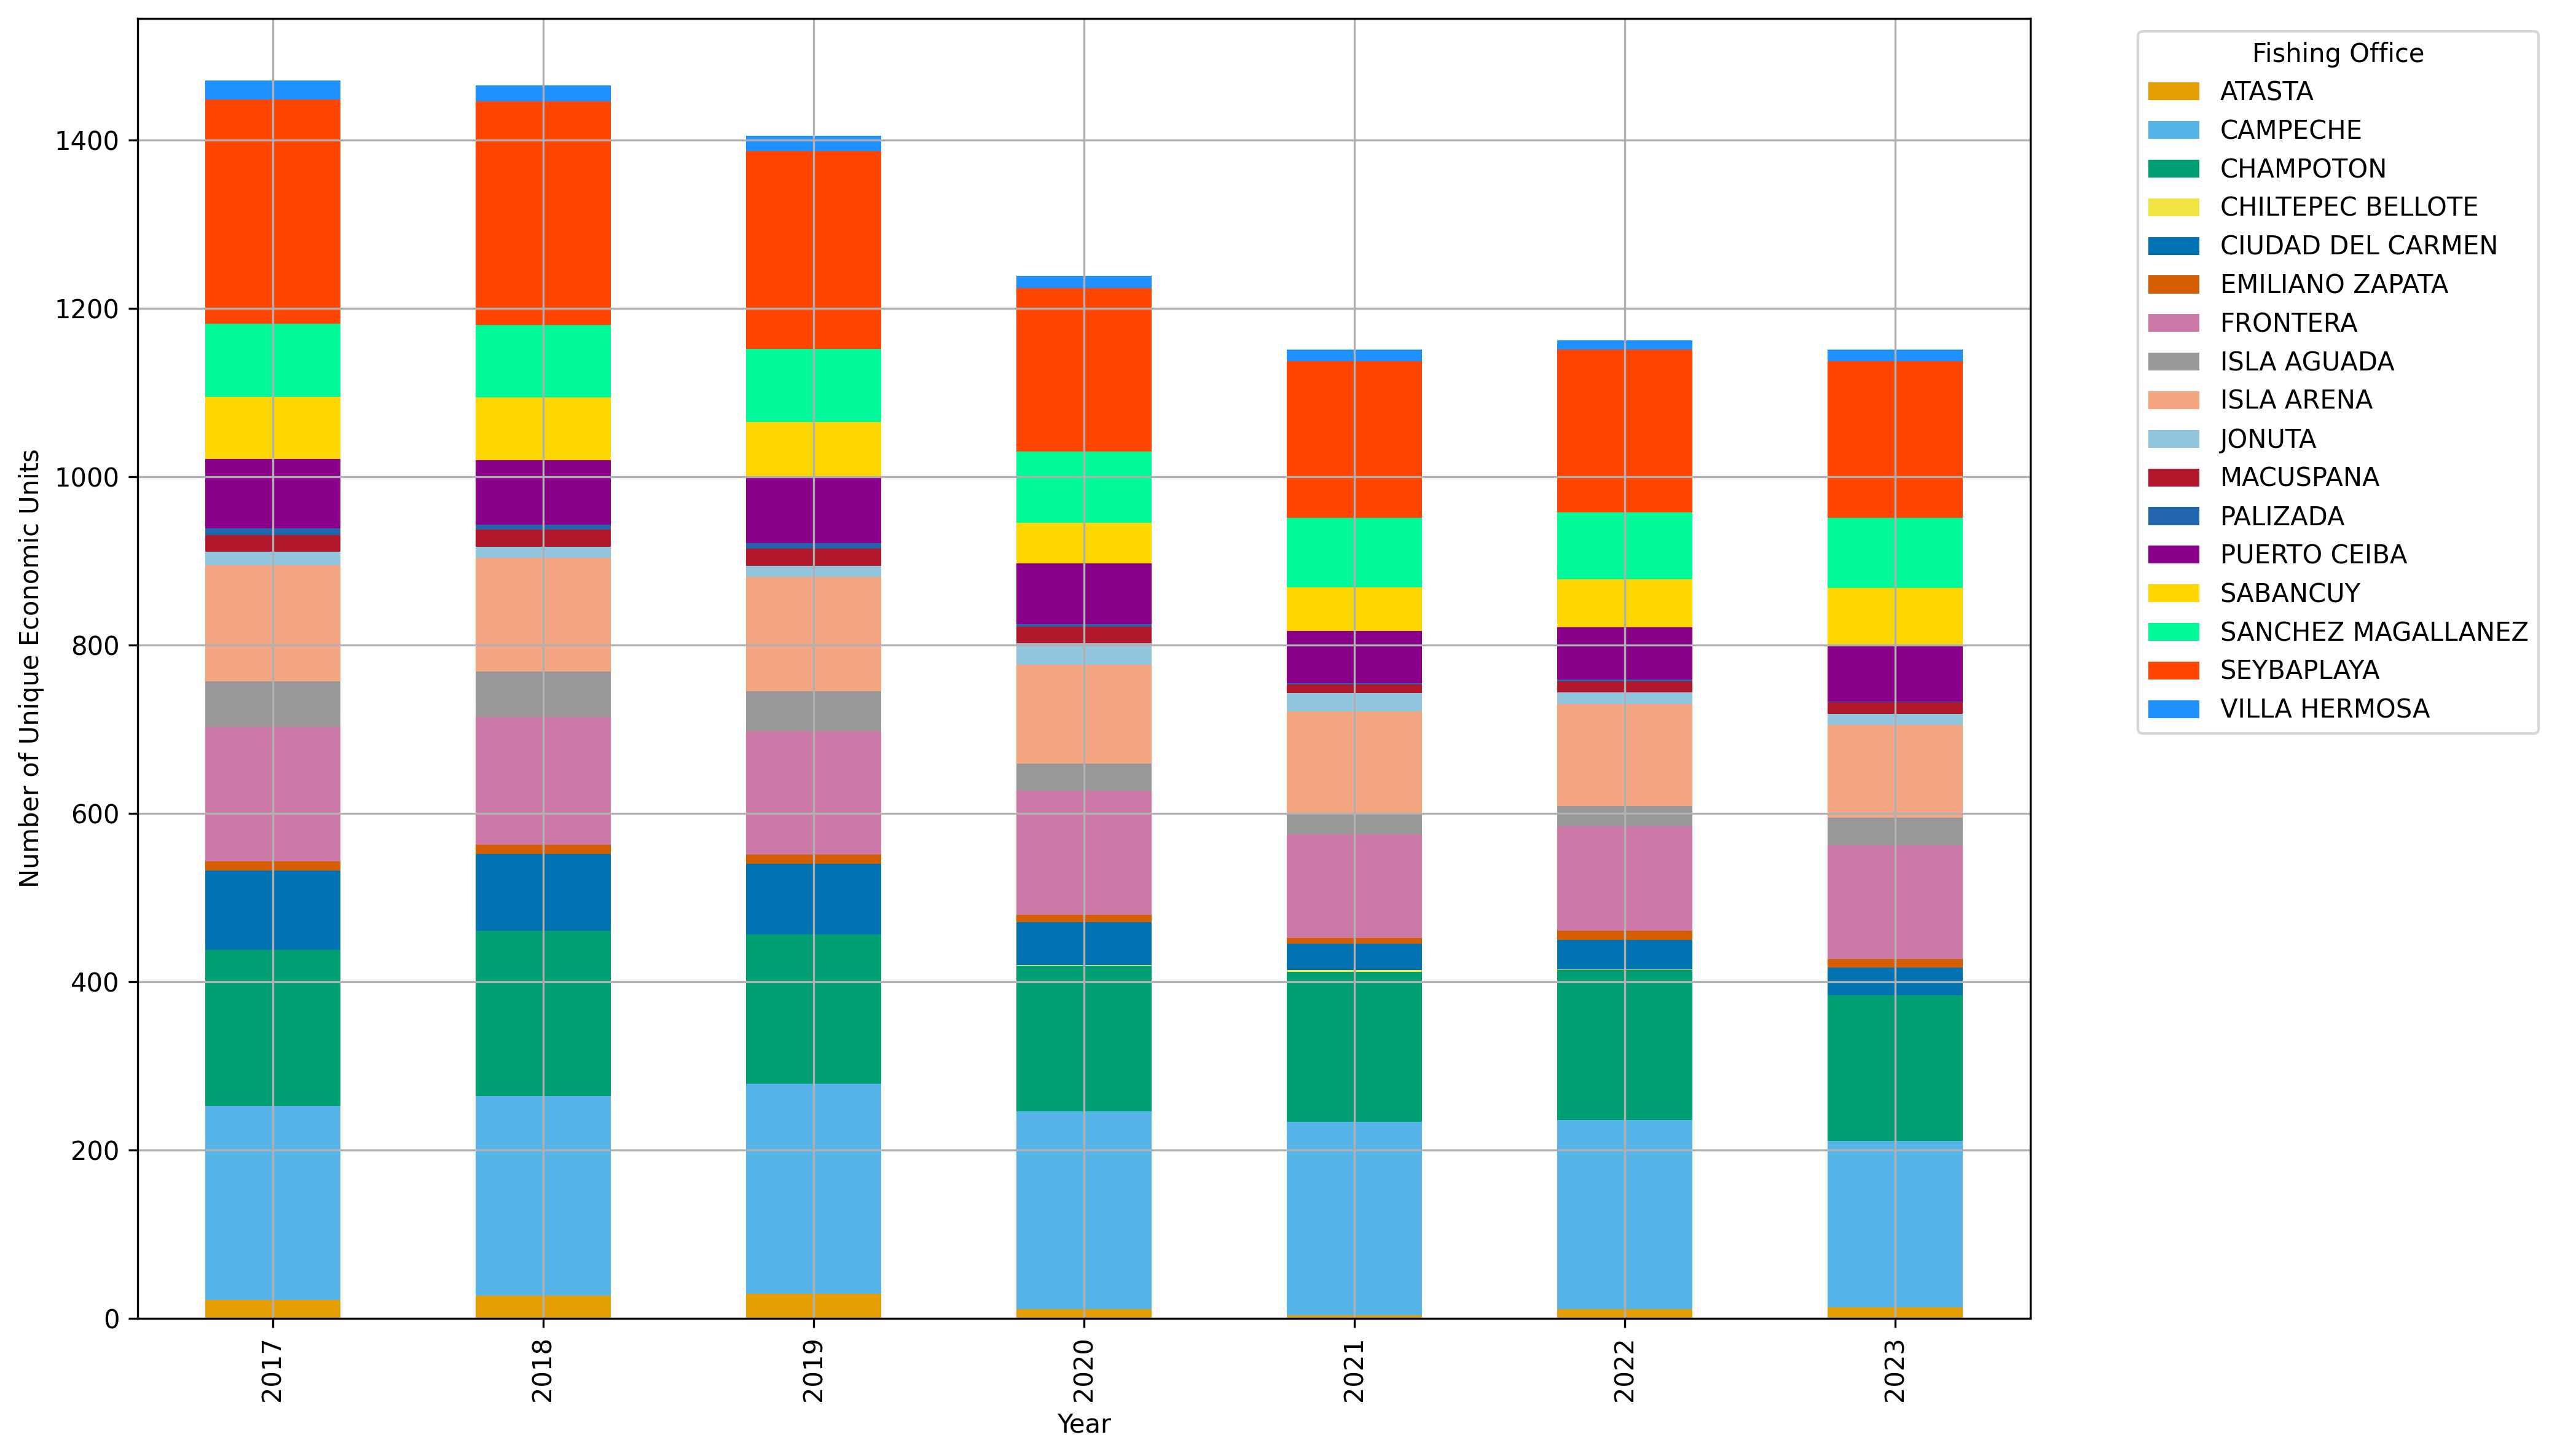

In [13]:
# Colores personalizados
custom_colors = [
    "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
    "#D55E00", "#CC79A7", "#999999", "#F4A582", "#92C5DE",
    "#B2182B", "#2166AC", "#8B008B", "#FFD700", "#00FA9A", 
    "#FF4500", "#1E90FF", "#DA70D6"
]

# Convertir la columna de fecha a formato datetime y extraer el año para facilitar el filtrado
df1['FECHA AVISO'] = pd.to_datetime(df1['FECHA AVISO'], format='%d/%m/%Y')
df1['YEAR'] = df1['FECHA AVISO'].dt.year

# Filtrar los datos para los años 2017 a 2023
df1_filtered = df1[df1['YEAR'].between(2017, 2023)]

# Agregar los datos por oficina y año para contar el número de unidades económicas únicas
units_by_office_year = df1_filtered.groupby(['YEAR', 'NOMBRE OFICINA'])['UNIDAD ECONOMICA'].nunique().unstack(fill_value=0)

# Crear la gráfica de barras apiladas
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
units_by_office_year.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)

# Agregar etiquetas y título
plt.xlabel('Year')
plt.ylabel('Number of Unique Economic Units')
#plt.title('Number of Unique Economic Units Registered per Year (2017-2023) in Each Fishing Office')
plt.legend(title='Fishing Office', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Ajustar el layout y mostrar la gráfica
plt.tight_layout()
plt.show()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic


def calculate_monthly_distances(data, vessel_col, date_col, lat_col, lon_col):
    """
    Calcula las distancias recorridas mensualmente por cada embarcación.

    Parámetros:
    - data: DataFrame con los datos.
    - vessel_col: Nombre de la columna que contiene los nombres de las embarcaciones.
    - date_col: Nombre de la columna que contiene las fechas.
    - lat_col: Nombre de la columna que contiene las latitudes.
    - lon_col: Nombre de la columna que contiene las longitudes.

    Retorna:
    - DataFrame con las distancias recorridas mensualmente por cada embarcación.
    """
    # Asegurarse de que las columnas de longitud y latitud sean del tipo float
    data[lon_col] = data[lon_col].astype(float)
    data[lat_col] = data[lat_col].astype(float)

    # Convertir la columna de fecha y hora al tipo datetime, ignorando errores
    data[date_col] = pd.to_datetime(data[date_col], format='%d/%m/%Y %H:%M', errors='coerce')

    # Eliminar filas con fechas inválidas
    data = data.dropna(subset=[date_col])

    # Extraer año y mes de la columna de fecha
    data['Anio'] = data[date_col].dt.year
    data['Mes'] = data[date_col].dt.month

    # Ordenar los datos por embarcación y fecha
    data = data.sort_values(by=[vessel_col, date_col])

    # Función para calcular la distancia entre dos puntos geográficos
    def haversine_distance(row):
        if pd.isna(row['prev_lat']) or pd.isna(row['prev_lon']):
            return 0
        else:
            return geodesic((row['prev_lat'], row['prev_lon']), (row[lat_col], row[lon_col])).kilometers

    # Calcular las distancias
    data['prev_lat'] = data.groupby(vessel_col)[lat_col].shift(1)
    data['prev_lon'] = data.groupby(vessel_col)[lon_col].shift(1)
    data['distance_km'] = data.apply(haversine_distance, axis=1)

    # Sumar las distancias por mes y embarcación
    data['YearMonth'] = data['Anio'].astype(str) + '-' + data['Mes'].astype(str).str.zfill(2)
    monthly_distances = data.groupby([vessel_col, 'YearMonth'])['distance_km'].sum().reset_index()

    return monthly_distances

In [ ]:
import pandas as pd
import glob
import os

# Especifica la ruta de la carpeta que contiene los archivos CSV
carpeta_csv = 'archivos_filtrados'  # Cambia esta ruta a la de tu carpeta

# Usa glob para encontrar todos los archivos CSV en la carpeta
archivos_csv = glob.glob(os.path.join(carpeta_csv, '*.csv'))

# Crea una lista para almacenar cada DataFrame individual
dataframes = []

# Diccionario de renombre de columnas
columnas_renombradas = {
    'Nombre': 'Nombre_Embarcacion',
    'Puerto_Base': 'Puerto Base',
    'Razón Social': 'Permisionario o concesionario',
    'Pemisionario o Concesionario': 'Permisionario o concesionario'
}

# Itera sobre la lista de archivos CSV y lee cada uno en un DataFrame
for archivo in archivos_csv:
    df = pd.read_csv(archivo)
    
    # Renombrar las columnas según el diccionario
    df.rename(columns=columnas_renombradas, inplace=True)
    
    # Eliminar la columna 'Unnamed: 9' si existe
    if 'Unnamed: 9' in df.columns:
        df.drop(columns=['Unnamed: 9'], inplace=True)
    
    dataframes.append(df)

# Concatena todos los DataFrames en uno solo
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Guarda el DataFrame concatenado en un nuevo archivo CSV
df_concatenado.to_csv('vms_concatenado.csv', index=False)  # Cambia esta ruta y nombre de archivo según tus necesidades

print(f'Se han unido {len(archivos_csv)} archivos CSV en un único DataFrame y se ha guardado como csv_concatenado.csv')

In [2]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_monthly_distances(data, vessel_col, date_col, lat_col, lon_col):
    """
    Calculates the monthly distances traveled and operation hours by each vessel.

    Parameters:
    - data: DataFrame with the data.
    - vessel_col: Name of the column containing the vessel names.
    - date_col: Name of the column containing the dates.
    - lat_col: Name of the column containing the latitudes.
    - lon_col: Name of the column containing the longitudes.

    Returns:
    - DataFrame with the monthly distances traveled and operation hours by each vessel.
    """
    # Ensure that the longitude and latitude columns are of type float
    data = data.copy()  # Make a copy of the DataFrame to avoid SettingWithCopyWarning
    data[lon_col] = data[lon_col].astype(float)
    data[lat_col] = data[lat_col].astype(float)

    # Convert the date column to datetime, ignoring errors
    data[date_col] = pd.to_datetime(data[date_col], format='%d/%m/%Y %H:%M:%S', errors='coerce')

    # Drop rows with invalid dates
    data = data.dropna(subset=[date_col])

    # Extract year and month from the date column
    data['Year'] = data[date_col].dt.year
    data['Month'] = data[date_col].dt.month

    # Sort data by vessel and date
    data = data.sort_values(by=[vessel_col, date_col])

    # Create a geometry column from longitude and latitude columns
    data['geometry'] = [Point(xy) for xy in zip(data[lon_col], data[lat_col])]
    gdf = gpd.GeoDataFrame(data, geometry='geometry')

    # Calculate the distance between consecutive points in time for each vessel
    def calculate_distance(row):
        if pd.isnull(row['Latitud_prev']) or pd.isnull(row['Longitud_prev']):
            return 0
        return geodesic((row['Latitud'], row['Longitud']), (row['Latitud_prev'], row['Longitud_prev'])).km

    # Shift the coordinates and time to get the previous point and time
    gdf['Latitud_prev'] = gdf.groupby(vessel_col)[lat_col].shift()
    gdf['Longitud_prev'] = gdf.groupby(vessel_col)[lon_col].shift()
    gdf['Fecha_prev'] = gdf.groupby(vessel_col)[date_col].shift()

    # Apply the distance calculation
    gdf['Distancia_km'] = gdf.apply(calculate_distance, axis=1)

    # Calculate the time difference in hours
    gdf['Tiempo_horas'] = (gdf[date_col] - gdf['Fecha_prev']).dt.total_seconds() / 3600

    # Replace NaN in distance and time columns with 0
    gdf['Distancia_km'] = gdf['Distancia_km'].fillna(0)
    gdf['Tiempo_horas'] = gdf['Tiempo_horas'].fillna(0)

    # Create a year-month column
    gdf['YearMonth'] = gdf[date_col].dt.to_period('Y')

    # Verify distribution of dates
    print(gdf['YearMonth'].value_counts().sort_index())

    # Calculate the total distance traveled and hours at sea monthly for each vessel
    monthly_distance_time = gdf.groupby([vessel_col, 'YearMonth']).agg({
        'Distancia_km': 'sum',
        'Tiempo_horas': 'sum'
    }).reset_index()

    # Convert 'YearMonth' to datetime for proper sorting in plots
    monthly_distance_time['YearMonth'] = monthly_distance_time['YearMonth'].dt.to_timestamp()

    # Calculate the monthly averages of distance traveled and time at sea
    mean_distance = monthly_distance_time.groupby('YearMonth')['Distancia_km'].mean()
    mean_hours = monthly_distance_time.groupby('YearMonth')['Tiempo_horas'].mean()

    # Plot the boxplots in a single figure
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), dpi=300)

    # Plot a boxplot of the monthly distance traveled for all vessels
    sns.boxplot(ax=axes[0], x='YearMonth', y='Distancia_km', data=monthly_distance_time, showfliers=False)
    #axes[0].plot(mean_distance.index.astype(str), mean_distance.values, color='red', marker='o', linestyle='-', linewidth=2, label='Mean')
    axes[0].set_title('a)', loc='left')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Distance Traveled (km)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True)
    axes[0].legend()

    # Plot a boxplot of the monthly operation hours for all vessels
    sns.boxplot(ax=axes[1], x='YearMonth', y='Tiempo_horas', data=monthly_distance_time, showfliers=False)
    #axes[1].plot(mean_hours.index.astype(str), mean_hours.values, color='red', marker='o', linestyle='-', linewidth=2, label='Mean')
    axes[1].set_title('b)', loc='left')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Mean operation hours')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True)
    axes[1].legend()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    return monthly_distance_time, mean_distance, mean_hours

In [4]:
df_concatenado = pd.read_csv('vms_concatenado.csv',low_memory=False)


In [ ]:

# Aplicar la función con los nombres de columnas apropiados
vessel_col = 'Nombre_Embarcacion'
date_col = 'Fecha'
lat_col = 'Latitud'
lon_col = 'Longitud'

monthly_distance_time, mean_distance, mean_hours =  calculate_monthly_distances(df_concatenado, vessel_col, date_col, lat_col, lon_col)

In [5]:
lista= ['FRONTERA  TAB.', 'PROGRESO', 'CELESTUN','FRONTERA  TAB.', 'PROGRESO', 'CELESTUN','FRONTERA  TAB.', 'PROGRESO', 'CELESTUN','CIUDAD DEL CARMEN  CAM.','DZILAM DE BRAVO','CAMPECHE, CAMPECHE','FRONTERA, TABASCO', 'LERMA, CAMPECHE','CIUDAD DEL CARMEN, CAMPECHE']
data_vms = df_concatenado[df_concatenado['Puerto Base'].isin(lista)]

In [6]:
import pandas as pd

# Cargar los datos desde el archivo CSV
data_vms = pd.read_csv('vms_concatenado.csv',low_memory=False)

# Asegurarse de que la columna 'Fecha' es de tipo datetime
data_vms['Fecha'] = pd.to_datetime(data_vms['Fecha'],errors='coerce')
lista= ['FRONTERA  TAB.', 'PROGRESO', 'CELESTUN','FRONTERA  TAB.', 'PROGRESO', 'CELESTUN','FRONTERA  TAB.', 'PROGRESO', 'CELESTUN','CIUDAD DEL CARMEN  CAM.','DZILAM DE BRAVO','CAMPECHE, CAMPECHE','FRONTERA, TABASCO', 'LERMA, CAMPECHE','CIUDAD DEL CARMEN, CAMPECHE']
data_vms = df_concatenado[df_concatenado['Puerto Base'].isin(lista)]
# Filtrar los datos por año
data_2017 = data_vms.loc[data_vms['Fecha'].dt.year == 2018].copy()
data_2023 = data_vms.loc[data_vms['Fecha'].dt.year == 2022].copy()

data_2017.to_csv('vms_tab_2018.csv')
data_2023.to_csv('vms_tab_2023.csv')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Cargar los datos
vms_2018 = pd.read_csv('vms_tab_2018.csv')
vms_2023 = pd.read_csv('vms_tab_2023.csv')
vertices = pd.read_csv('vms_vertices.csv')

# Convertir los datos a GeoDataFrame
vms_2018['geometry'] = gpd.points_from_xy(vms_2018.Longitud, vms_2018.Latitud)
vms_2023['geometry'] = gpd.points_from_xy(vms_2023.Longitud, vms_2023.Latitud)

# Convert 'Fecha' to datetime
vms_2018['Fecha'] = pd.to_datetime(vms_2018['Fecha'])
vms_2023['Fecha'] = pd.to_datetime(vms_2023['Fecha'])

# Filter data by quarters
q1_2018 = vms_2018[vms_2018['Fecha'].dt.quarter == 1]
q2_2018 = vms_2018[vms_2018['Fecha'].dt.quarter == 2]
q3_2018 = vms_2018[vms_2018['Fecha'].dt.quarter == 3]

q1_2023 = vms_2023[vms_2023['Fecha'].dt.quarter == 1]
q2_2023 = vms_2023[vms_2023['Fecha'].dt.quarter == 2]
q3_2023 = vms_2023[vms_2023['Fecha'].dt.quarter == 3]

# Determinar los límites del mapa
minx, miny = vertices[['Longitud', 'Latitud']].min()
maxx, maxy = vertices[['Longitud', 'Latitud']].max()

# Crear la figura
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Función para crear un mapa de calor con mapa base
def heatmap(ax, x, y, title, vmin=0, vmax=800):
    hb = ax.hexbin(x, y, gridsize=40, cmap='inferno', mincnt=5, vmin=vmin, vmax=vmax)
    ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=6, crs='EPSG:4326')
    ax.set_title(title)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    cb = fig.colorbar(hb, ax=ax, orientation='vertical')
    cb.set_label('Counts')

# Plotear los datos de 2018
heatmap(axes[0, 0], q1_2018.Longitud, q1_2018.Latitud, 'Q1 2018')
heatmap(axes[0, 1], q2_2018.Longitud, q2_2018.Latitud, 'Q2 2018')
heatmap(axes[0, 2], q3_2018.Longitud, q3_2018.Latitud, 'Q3 2018')

# Plotear los datos de 2023
heatmap(axes[1, 0], q1_2023.Longitud, q1_2023.Latitud, 'Q1 2023')
heatmap(axes[1, 1], q2_2023.Longitud, q2_2023.Latitud, 'Q2 2023')
heatmap(axes[1, 2], q3_2023.Longitud, q3_2023.Latitud, 'Q3 2023')

# Mostrar la figura
plt.tight_layout()
plt.show()
